In [1]:
!pip install mlxtend


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install catboost


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import validation_curve
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt

In [4]:
dataframe = pd.read_csv("trainFinal.csv")

In [5]:
dataframe.drop("Unnamed: 0", inplace=True, axis=1)

In [6]:
dataframe

,Participant_Type,Successful_Submission_Count,Comp_participation_day,FeatureA,FeatureB,FeatureC,FeatureD,FeatureE,SecretCode,FeatureF,...,Updated_Profile,blog_ID,Viewed_Discussion,Updated_Submission,count_UA,Day_duration,FeatureX,FeatureY,User_sign-in_day,Active
0,0.000000,0.0,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,...,0.0,0.0,0.0,0.0,6.000000,5.0,0.000000,1.000000,22.000000,0.0
1,0.000000,0.0,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,...,2.0,0.0,0.0,0.0,6.000000,1.5,-0.500000,-0.500000,14.000000,0.0
2,0.000000,0.0,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,...,2.0,0.0,0.0,0.0,10.000000,9.0,0.000000,0.000000,7.000000,0.0
3,0.000000,0.0,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,...,0.0,1.0,0.0,0.0,10.000000,10.0,0.000000,0.000000,6.000000,0.0
4,0.000000,0.0,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,...,1.0,0.0,0.0,0.0,5.000000,1.0,-0.500000,0.000000,11.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11068,0.000000,0.0,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,...,0.0,0.0,0.0,0.0,8.000000,1.0,0.000000,0.000000,27.000000,0.0
11069,0.333333,0.0,2.666667,-0.333333,-0.333333,3.666667,-0.333333,0.0,-0.666667,-0.333333,...,0.0,0.0,0.0,0.0,15.333333,2.0,-0.666667,-0.333333,2.666667,0.0
11070,1.000000,0.0,29.000000,1.500000,0.000000,13.500000,0.000000,2.0,1.000000,3.000000,...,0.0,0.0,0.0,0.0,134.000000,2.0,0.000000,3.000000,29.000000,0.0
11071,0.000000,0.0,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,...,0.0,0.0,0.0,0.0,12.000000,1.0,0.000000,0.000000,30.000000,0.0


In [7]:
my_cols = set(dataframe.columns)
my_cols.remove('Active')

In [8]:
for column in dataframe:
    dataframe[column] = dataframe[column] / dataframe[column].abs().max()

In [9]:
data = dataframe.values

In [10]:
data.shape

(11073, 44)

In [11]:
X, y = data[:, :-1], data[:, -1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [15]:
model = CatBoostClassifier(n_estimators=80, learning_rate=0.5860000000000001).fit(X, y)

0:	learn: 0.2023947	total: 214ms	remaining: 16.9s
1:	learn: 0.1591130	total: 225ms	remaining: 8.79s
2:	learn: 0.1477288	total: 234ms	remaining: 6.02s
3:	learn: 0.1413809	total: 246ms	remaining: 4.67s
4:	learn: 0.1318034	total: 259ms	remaining: 3.89s
5:	learn: 0.1243686	total: 269ms	remaining: 3.31s
6:	learn: 0.1193079	total: 280ms	remaining: 2.92s
7:	learn: 0.1162904	total: 289ms	remaining: 2.6s
8:	learn: 0.1140406	total: 298ms	remaining: 2.35s
9:	learn: 0.1096549	total: 308ms	remaining: 2.15s
10:	learn: 0.1066422	total: 317ms	remaining: 1.99s
11:	learn: 0.1046302	total: 326ms	remaining: 1.85s
12:	learn: 0.1004817	total: 336ms	remaining: 1.73s
13:	learn: 0.0987784	total: 346ms	remaining: 1.63s
14:	learn: 0.0977338	total: 355ms	remaining: 1.54s
15:	learn: 0.0961026	total: 364ms	remaining: 1.46s
16:	learn: 0.0942262	total: 374ms	remaining: 1.39s
17:	learn: 0.0924791	total: 383ms	remaining: 1.32s
18:	learn: 0.0891317	total: 395ms	remaining: 1.27s
19:	learn: 0.0877366	total: 408ms	remainin

In [17]:
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=20, random_seed=1)

0:	learn: 0.1790452	total: 6.29ms	remaining: 497ms
1:	learn: 0.1420318	total: 13.5ms	remaining: 525ms
2:	learn: 0.1345731	total: 19.2ms	remaining: 492ms
3:	learn: 0.1255814	total: 24.9ms	remaining: 472ms
4:	learn: 0.1078206	total: 30.7ms	remaining: 461ms
5:	learn: 0.1010287	total: 36.5ms	remaining: 450ms
6:	learn: 0.0977722	total: 43.3ms	remaining: 452ms
7:	learn: 0.0946283	total: 49.1ms	remaining: 442ms
8:	learn: 0.0919746	total: 54.8ms	remaining: 432ms
9:	learn: 0.0879220	total: 60.9ms	remaining: 426ms
10:	learn: 0.0837212	total: 66.6ms	remaining: 418ms
11:	learn: 0.0806902	total: 73.3ms	remaining: 416ms
12:	learn: 0.0788668	total: 79.5ms	remaining: 410ms
13:	learn: 0.0745804	total: 85.6ms	remaining: 403ms
14:	learn: 0.0732577	total: 92ms	remaining: 399ms
15:	learn: 0.0710507	total: 97.9ms	remaining: 392ms
16:	learn: 0.0698291	total: 104ms	remaining: 385ms
17:	learn: 0.0679409	total: 110ms	remaining: 378ms
18:	learn: 0.0622159	total: 116ms	remaining: 372ms
19:	learn: 0.0604881	total:

29:	learn: 0.0451675	total: 184ms	remaining: 307ms
30:	learn: 0.0433824	total: 191ms	remaining: 302ms
31:	learn: 0.0415541	total: 199ms	remaining: 298ms
32:	learn: 0.0400861	total: 206ms	remaining: 294ms
33:	learn: 0.0395036	total: 212ms	remaining: 287ms
34:	learn: 0.0378059	total: 218ms	remaining: 280ms
35:	learn: 0.0360346	total: 224ms	remaining: 274ms
36:	learn: 0.0346519	total: 230ms	remaining: 267ms
37:	learn: 0.0331921	total: 236ms	remaining: 260ms
38:	learn: 0.0321302	total: 243ms	remaining: 255ms
39:	learn: 0.0310283	total: 249ms	remaining: 249ms
40:	learn: 0.0303867	total: 255ms	remaining: 243ms
41:	learn: 0.0288686	total: 263ms	remaining: 238ms
42:	learn: 0.0282237	total: 270ms	remaining: 232ms
43:	learn: 0.0268075	total: 276ms	remaining: 226ms
44:	learn: 0.0259230	total: 282ms	remaining: 219ms
45:	learn: 0.0252299	total: 287ms	remaining: 212ms
46:	learn: 0.0240526	total: 294ms	remaining: 206ms
47:	learn: 0.0232381	total: 300ms	remaining: 200ms
48:	learn: 0.0224362	total: 306

30:	learn: 0.0344425	total: 189ms	remaining: 299ms
31:	learn: 0.0337002	total: 195ms	remaining: 292ms
32:	learn: 0.0336010	total: 201ms	remaining: 286ms
33:	learn: 0.0329053	total: 208ms	remaining: 281ms
34:	learn: 0.0315528	total: 216ms	remaining: 277ms
35:	learn: 0.0306075	total: 222ms	remaining: 272ms
36:	learn: 0.0282096	total: 229ms	remaining: 266ms
37:	learn: 0.0275628	total: 236ms	remaining: 260ms
38:	learn: 0.0272503	total: 241ms	remaining: 254ms
39:	learn: 0.0264786	total: 249ms	remaining: 249ms
40:	learn: 0.0253050	total: 255ms	remaining: 242ms
41:	learn: 0.0246886	total: 261ms	remaining: 236ms
42:	learn: 0.0239100	total: 267ms	remaining: 229ms
43:	learn: 0.0233402	total: 273ms	remaining: 223ms
44:	learn: 0.0220804	total: 279ms	remaining: 217ms
45:	learn: 0.0216610	total: 285ms	remaining: 210ms
46:	learn: 0.0203170	total: 291ms	remaining: 204ms
47:	learn: 0.0198873	total: 298ms	remaining: 198ms
48:	learn: 0.0192436	total: 303ms	remaining: 192ms
49:	learn: 0.0188991	total: 309

52:	learn: 0.0217193	total: 343ms	remaining: 175ms
53:	learn: 0.0213635	total: 351ms	remaining: 169ms
54:	learn: 0.0211505	total: 357ms	remaining: 162ms
55:	learn: 0.0206640	total: 367ms	remaining: 157ms
56:	learn: 0.0201307	total: 378ms	remaining: 152ms
57:	learn: 0.0195649	total: 387ms	remaining: 147ms
58:	learn: 0.0187835	total: 395ms	remaining: 141ms
59:	learn: 0.0182651	total: 403ms	remaining: 134ms
60:	learn: 0.0177007	total: 410ms	remaining: 128ms
61:	learn: 0.0176194	total: 418ms	remaining: 121ms
62:	learn: 0.0172698	total: 425ms	remaining: 115ms
63:	learn: 0.0168055	total: 434ms	remaining: 108ms
64:	learn: 0.0164014	total: 441ms	remaining: 102ms
65:	learn: 0.0163422	total: 449ms	remaining: 95.3ms
66:	learn: 0.0160737	total: 455ms	remaining: 88.3ms
67:	learn: 0.0158078	total: 464ms	remaining: 81.8ms
68:	learn: 0.0155337	total: 470ms	remaining: 74.9ms
69:	learn: 0.0150617	total: 478ms	remaining: 68.3ms
70:	learn: 0.0148548	total: 485ms	remaining: 61.5ms
71:	learn: 0.0148171	tota

67:	learn: 0.0145929	total: 559ms	remaining: 98.7ms
68:	learn: 0.0137607	total: 568ms	remaining: 90.5ms
69:	learn: 0.0135113	total: 579ms	remaining: 82.6ms
70:	learn: 0.0134989	total: 588ms	remaining: 74.5ms
71:	learn: 0.0130460	total: 601ms	remaining: 66.7ms
72:	learn: 0.0129372	total: 610ms	remaining: 58.5ms
73:	learn: 0.0126006	total: 619ms	remaining: 50.2ms
74:	learn: 0.0122356	total: 626ms	remaining: 41.8ms
75:	learn: 0.0120816	total: 634ms	remaining: 33.4ms
76:	learn: 0.0119701	total: 642ms	remaining: 25ms
77:	learn: 0.0114811	total: 650ms	remaining: 16.7ms
78:	learn: 0.0113780	total: 658ms	remaining: 8.32ms
79:	learn: 0.0106495	total: 665ms	remaining: 0us
0:	learn: 0.1972800	total: 7.75ms	remaining: 612ms
1:	learn: 0.1560983	total: 15.8ms	remaining: 617ms
2:	learn: 0.1273368	total: 24.1ms	remaining: 619ms
3:	learn: 0.1174048	total: 32.9ms	remaining: 625ms
4:	learn: 0.1113598	total: 39.8ms	remaining: 597ms
5:	learn: 0.1051451	total: 46ms	remaining: 568ms
6:	learn: 0.0990501	total

68:	learn: 0.0137720	total: 559ms	remaining: 89.1ms
69:	learn: 0.0133997	total: 568ms	remaining: 81.2ms
70:	learn: 0.0132667	total: 586ms	remaining: 74.2ms
71:	learn: 0.0128935	total: 598ms	remaining: 66.4ms
72:	learn: 0.0126470	total: 606ms	remaining: 58.2ms
73:	learn: 0.0126040	total: 615ms	remaining: 49.9ms
74:	learn: 0.0122093	total: 624ms	remaining: 41.6ms
75:	learn: 0.0119374	total: 633ms	remaining: 33.3ms
76:	learn: 0.0115477	total: 643ms	remaining: 25ms
77:	learn: 0.0111717	total: 651ms	remaining: 16.7ms
78:	learn: 0.0111555	total: 660ms	remaining: 8.36ms
79:	learn: 0.0107633	total: 668ms	remaining: 0us
0:	learn: 0.2164471	total: 6.41ms	remaining: 507ms
1:	learn: 0.1688591	total: 13.1ms	remaining: 512ms
2:	learn: 0.1349933	total: 19.7ms	remaining: 505ms
3:	learn: 0.1285449	total: 25.8ms	remaining: 489ms
4:	learn: 0.1209284	total: 32.4ms	remaining: 485ms
5:	learn: 0.1134888	total: 38.9ms	remaining: 480ms
6:	learn: 0.1071156	total: 46.7ms	remaining: 487ms
7:	learn: 0.1035776	tota

76:	learn: 0.0111297	total: 578ms	remaining: 22.5ms
77:	learn: 0.0105766	total: 586ms	remaining: 15ms
78:	learn: 0.0104178	total: 595ms	remaining: 7.53ms
79:	learn: 0.0102914	total: 605ms	remaining: 0us
0:	learn: 0.2066383	total: 8ms	remaining: 632ms
1:	learn: 0.1452687	total: 15.3ms	remaining: 597ms
2:	learn: 0.1319996	total: 21.9ms	remaining: 562ms
3:	learn: 0.1226939	total: 29.7ms	remaining: 565ms
4:	learn: 0.1120014	total: 36.9ms	remaining: 554ms
5:	learn: 0.1062090	total: 44.1ms	remaining: 544ms
6:	learn: 0.0999556	total: 51.1ms	remaining: 533ms
7:	learn: 0.0935268	total: 59.2ms	remaining: 533ms
8:	learn: 0.0897294	total: 66.6ms	remaining: 526ms
9:	learn: 0.0868656	total: 75.2ms	remaining: 527ms
10:	learn: 0.0840576	total: 81.9ms	remaining: 514ms
11:	learn: 0.0761284	total: 92.9ms	remaining: 526ms
12:	learn: 0.0714372	total: 100ms	remaining: 516ms
13:	learn: 0.0695473	total: 109ms	remaining: 515ms
14:	learn: 0.0669309	total: 117ms	remaining: 507ms
15:	learn: 0.0636326	total: 125ms

0:	learn: 0.2011889	total: 8.51ms	remaining: 672ms
1:	learn: 0.1623225	total: 14.8ms	remaining: 577ms
2:	learn: 0.1484779	total: 23ms	remaining: 590ms
3:	learn: 0.1286427	total: 29.8ms	remaining: 565ms
4:	learn: 0.1140792	total: 37.6ms	remaining: 564ms
5:	learn: 0.1079561	total: 45.5ms	remaining: 561ms
6:	learn: 0.1059910	total: 52.4ms	remaining: 547ms
7:	learn: 0.0986815	total: 59.8ms	remaining: 538ms
8:	learn: 0.0950803	total: 66.7ms	remaining: 526ms
9:	learn: 0.0911271	total: 73.9ms	remaining: 517ms
10:	learn: 0.0888743	total: 79.9ms	remaining: 501ms
11:	learn: 0.0849334	total: 86.8ms	remaining: 492ms
12:	learn: 0.0803946	total: 93.8ms	remaining: 484ms
13:	learn: 0.0787569	total: 102ms	remaining: 481ms
14:	learn: 0.0752177	total: 110ms	remaining: 477ms
15:	learn: 0.0717220	total: 117ms	remaining: 467ms
16:	learn: 0.0691150	total: 124ms	remaining: 459ms
17:	learn: 0.0639573	total: 131ms	remaining: 452ms
18:	learn: 0.0631513	total: 138ms	remaining: 443ms
19:	learn: 0.0612265	total: 14

21:	learn: 0.0495500	total: 163ms	remaining: 430ms
22:	learn: 0.0488346	total: 171ms	remaining: 423ms
23:	learn: 0.0471328	total: 180ms	remaining: 421ms
24:	learn: 0.0442123	total: 189ms	remaining: 416ms
25:	learn: 0.0425644	total: 196ms	remaining: 407ms
26:	learn: 0.0410349	total: 203ms	remaining: 399ms
27:	learn: 0.0396518	total: 210ms	remaining: 390ms
28:	learn: 0.0384472	total: 217ms	remaining: 381ms
29:	learn: 0.0361257	total: 223ms	remaining: 372ms
30:	learn: 0.0345173	total: 231ms	remaining: 364ms
31:	learn: 0.0335392	total: 239ms	remaining: 358ms
32:	learn: 0.0326062	total: 245ms	remaining: 349ms
33:	learn: 0.0307691	total: 253ms	remaining: 342ms
34:	learn: 0.0299646	total: 261ms	remaining: 335ms
35:	learn: 0.0292313	total: 268ms	remaining: 328ms
36:	learn: 0.0285184	total: 275ms	remaining: 320ms
37:	learn: 0.0273092	total: 283ms	remaining: 313ms
38:	learn: 0.0269676	total: 290ms	remaining: 305ms
39:	learn: 0.0263296	total: 298ms	remaining: 298ms
40:	learn: 0.0257770	total: 307

24:	learn: 0.0531245	total: 196ms	remaining: 431ms
25:	learn: 0.0518517	total: 204ms	remaining: 424ms
26:	learn: 0.0498252	total: 213ms	remaining: 419ms
27:	learn: 0.0473142	total: 225ms	remaining: 418ms
28:	learn: 0.0465971	total: 233ms	remaining: 409ms
29:	learn: 0.0456835	total: 243ms	remaining: 404ms
30:	learn: 0.0440711	total: 250ms	remaining: 396ms
31:	learn: 0.0430624	total: 259ms	remaining: 389ms
32:	learn: 0.0414643	total: 267ms	remaining: 380ms
33:	learn: 0.0392607	total: 276ms	remaining: 373ms
34:	learn: 0.0377304	total: 283ms	remaining: 364ms
35:	learn: 0.0348016	total: 293ms	remaining: 359ms
36:	learn: 0.0331222	total: 304ms	remaining: 353ms
37:	learn: 0.0324391	total: 313ms	remaining: 346ms
38:	learn: 0.0322930	total: 323ms	remaining: 340ms
39:	learn: 0.0308586	total: 332ms	remaining: 332ms
40:	learn: 0.0307905	total: 341ms	remaining: 324ms
41:	learn: 0.0306243	total: 349ms	remaining: 316ms
42:	learn: 0.0298878	total: 360ms	remaining: 309ms
43:	learn: 0.0289563	total: 369

In [18]:
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.057
Bias: 0.038
Variance: 0.019


In [22]:
parameter_range = [float(x) for x in np.arange(0.5, 0.7, 0.005)]

In [25]:
len(parameter_range)

40

In [26]:
train_score, test_score = validation_curve(CatBoostClassifier(n_estimators=80), X_train, y_train,
                                       param_name = "learning_rate",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")

0:	learn: 0.2262292	total: 7.53ms	remaining: 595ms
1:	learn: 0.1832898	total: 13.3ms	remaining: 520ms
2:	learn: 0.1580657	total: 18.9ms	remaining: 486ms
3:	learn: 0.1460213	total: 24.6ms	remaining: 467ms
4:	learn: 0.1303468	total: 30.4ms	remaining: 456ms
5:	learn: 0.1263087	total: 36.4ms	remaining: 449ms
6:	learn: 0.1223816	total: 41.7ms	remaining: 435ms
7:	learn: 0.1188892	total: 47.1ms	remaining: 424ms
8:	learn: 0.1170311	total: 53.7ms	remaining: 423ms
9:	learn: 0.1116524	total: 59.3ms	remaining: 415ms
10:	learn: 0.1106436	total: 65.1ms	remaining: 408ms
11:	learn: 0.1076503	total: 70.5ms	remaining: 400ms
12:	learn: 0.1060297	total: 76.2ms	remaining: 392ms
13:	learn: 0.1042898	total: 81.9ms	remaining: 386ms
14:	learn: 0.1014874	total: 87.2ms	remaining: 378ms
15:	learn: 0.0986411	total: 92.7ms	remaining: 371ms
16:	learn: 0.0957942	total: 98.7ms	remaining: 366ms
17:	learn: 0.0893233	total: 105ms	remaining: 361ms
18:	learn: 0.0862523	total: 111ms	remaining: 357ms
19:	learn: 0.0813956	tot

0:	learn: 0.2236722	total: 7.12ms	remaining: 562ms
1:	learn: 0.1818629	total: 13.2ms	remaining: 514ms
2:	learn: 0.1602373	total: 18.7ms	remaining: 480ms
3:	learn: 0.1427622	total: 24.3ms	remaining: 461ms
4:	learn: 0.1349029	total: 29.9ms	remaining: 448ms
5:	learn: 0.1201415	total: 35.9ms	remaining: 442ms
6:	learn: 0.1160013	total: 42.2ms	remaining: 440ms
7:	learn: 0.1084154	total: 47.7ms	remaining: 429ms
8:	learn: 0.1057414	total: 53.6ms	remaining: 423ms
9:	learn: 0.1024201	total: 60.4ms	remaining: 423ms
10:	learn: 0.1007454	total: 65.7ms	remaining: 412ms
11:	learn: 0.0970170	total: 71.7ms	remaining: 406ms
12:	learn: 0.0928717	total: 77.3ms	remaining: 398ms
13:	learn: 0.0915319	total: 82.9ms	remaining: 391ms
14:	learn: 0.0894061	total: 88.4ms	remaining: 383ms
15:	learn: 0.0878954	total: 93.8ms	remaining: 375ms
16:	learn: 0.0877394	total: 99.3ms	remaining: 368ms
17:	learn: 0.0849930	total: 105ms	remaining: 361ms
18:	learn: 0.0833055	total: 111ms	remaining: 357ms
19:	learn: 0.0812149	tot

31:	learn: 0.0514992	total: 193ms	remaining: 289ms
32:	learn: 0.0502872	total: 199ms	remaining: 284ms
33:	learn: 0.0498037	total: 206ms	remaining: 278ms
34:	learn: 0.0479784	total: 212ms	remaining: 272ms
35:	learn: 0.0478064	total: 218ms	remaining: 266ms
36:	learn: 0.0473475	total: 223ms	remaining: 260ms
37:	learn: 0.0458392	total: 229ms	remaining: 253ms
38:	learn: 0.0450882	total: 236ms	remaining: 248ms
39:	learn: 0.0440648	total: 241ms	remaining: 241ms
40:	learn: 0.0439750	total: 248ms	remaining: 236ms
41:	learn: 0.0425783	total: 254ms	remaining: 230ms
42:	learn: 0.0416055	total: 260ms	remaining: 224ms
43:	learn: 0.0410384	total: 266ms	remaining: 217ms
44:	learn: 0.0399438	total: 271ms	remaining: 211ms
45:	learn: 0.0392773	total: 277ms	remaining: 205ms
46:	learn: 0.0385874	total: 283ms	remaining: 199ms
47:	learn: 0.0376432	total: 289ms	remaining: 193ms
48:	learn: 0.0365001	total: 294ms	remaining: 186ms
49:	learn: 0.0354620	total: 300ms	remaining: 180ms
50:	learn: 0.0347853	total: 307

57:	learn: 0.0298219	total: 349ms	remaining: 132ms
58:	learn: 0.0293590	total: 356ms	remaining: 127ms
59:	learn: 0.0293484	total: 363ms	remaining: 121ms
60:	learn: 0.0284542	total: 369ms	remaining: 115ms
61:	learn: 0.0281259	total: 374ms	remaining: 109ms
62:	learn: 0.0274716	total: 380ms	remaining: 103ms
63:	learn: 0.0269164	total: 388ms	remaining: 97ms
64:	learn: 0.0265142	total: 393ms	remaining: 90.8ms
65:	learn: 0.0265075	total: 399ms	remaining: 84.6ms
66:	learn: 0.0262668	total: 404ms	remaining: 78.4ms
67:	learn: 0.0254379	total: 410ms	remaining: 72.3ms
68:	learn: 0.0252208	total: 415ms	remaining: 66.2ms
69:	learn: 0.0245496	total: 421ms	remaining: 60.1ms
70:	learn: 0.0243662	total: 427ms	remaining: 54.1ms
71:	learn: 0.0238493	total: 433ms	remaining: 48.1ms
72:	learn: 0.0236029	total: 439ms	remaining: 42.1ms
73:	learn: 0.0232750	total: 444ms	remaining: 36ms
74:	learn: 0.0230588	total: 450ms	remaining: 30ms
75:	learn: 0.0222979	total: 456ms	remaining: 24ms
76:	learn: 0.0219891	total

59:	learn: 0.0274862	total: 364ms	remaining: 121ms
60:	learn: 0.0262415	total: 371ms	remaining: 115ms
61:	learn: 0.0257523	total: 379ms	remaining: 110ms
62:	learn: 0.0256509	total: 387ms	remaining: 104ms
63:	learn: 0.0252881	total: 393ms	remaining: 98.3ms
64:	learn: 0.0249138	total: 399ms	remaining: 92.1ms
65:	learn: 0.0242364	total: 405ms	remaining: 85.8ms
66:	learn: 0.0237674	total: 410ms	remaining: 79.6ms
67:	learn: 0.0234556	total: 416ms	remaining: 73.4ms
68:	learn: 0.0234377	total: 422ms	remaining: 67.2ms
69:	learn: 0.0230949	total: 427ms	remaining: 61ms
70:	learn: 0.0224703	total: 434ms	remaining: 55ms
71:	learn: 0.0220534	total: 440ms	remaining: 48.8ms
72:	learn: 0.0216919	total: 445ms	remaining: 42.7ms
73:	learn: 0.0215718	total: 451ms	remaining: 36.6ms
74:	learn: 0.0209725	total: 457ms	remaining: 30.4ms
75:	learn: 0.0208927	total: 462ms	remaining: 24.3ms
76:	learn: 0.0205633	total: 468ms	remaining: 18.2ms
77:	learn: 0.0202564	total: 474ms	remaining: 12.1ms
78:	learn: 0.0202028

61:	learn: 0.0266419	total: 372ms	remaining: 108ms
62:	learn: 0.0266169	total: 378ms	remaining: 102ms
63:	learn: 0.0261807	total: 385ms	remaining: 96.4ms
64:	learn: 0.0256566	total: 391ms	remaining: 90.2ms
65:	learn: 0.0256485	total: 396ms	remaining: 84.1ms
66:	learn: 0.0253996	total: 402ms	remaining: 78ms
67:	learn: 0.0245042	total: 408ms	remaining: 71.9ms
68:	learn: 0.0239131	total: 413ms	remaining: 65.9ms
69:	learn: 0.0236607	total: 419ms	remaining: 59.8ms
70:	learn: 0.0233809	total: 425ms	remaining: 53.9ms
71:	learn: 0.0228938	total: 431ms	remaining: 47.9ms
72:	learn: 0.0224824	total: 437ms	remaining: 41.9ms
73:	learn: 0.0221485	total: 444ms	remaining: 36ms
74:	learn: 0.0214509	total: 450ms	remaining: 30ms
75:	learn: 0.0211028	total: 455ms	remaining: 24ms
76:	learn: 0.0208550	total: 461ms	remaining: 18ms
77:	learn: 0.0200918	total: 467ms	remaining: 12ms
78:	learn: 0.0194715	total: 473ms	remaining: 5.99ms
79:	learn: 0.0190857	total: 478ms	remaining: 0us
0:	learn: 0.2135717	total: 5.

0:	learn: 0.2116040	total: 6.14ms	remaining: 485ms
1:	learn: 0.1700697	total: 12.2ms	remaining: 476ms
2:	learn: 0.1445291	total: 18ms	remaining: 463ms
3:	learn: 0.1278631	total: 23.9ms	remaining: 454ms
4:	learn: 0.1202438	total: 29.1ms	remaining: 436ms
5:	learn: 0.1139840	total: 34.8ms	remaining: 430ms
6:	learn: 0.1106136	total: 41ms	remaining: 427ms
7:	learn: 0.1060958	total: 46.6ms	remaining: 419ms
8:	learn: 0.1016252	total: 52.3ms	remaining: 413ms
9:	learn: 0.0951563	total: 58.1ms	remaining: 407ms
10:	learn: 0.0914334	total: 63.5ms	remaining: 399ms
11:	learn: 0.0876460	total: 69ms	remaining: 391ms
12:	learn: 0.0863732	total: 74.6ms	remaining: 384ms
13:	learn: 0.0843524	total: 81ms	remaining: 382ms
14:	learn: 0.0819779	total: 87.1ms	remaining: 377ms
15:	learn: 0.0787349	total: 94.3ms	remaining: 377ms
16:	learn: 0.0776917	total: 100ms	remaining: 371ms
17:	learn: 0.0750558	total: 106ms	remaining: 364ms
18:	learn: 0.0733864	total: 111ms	remaining: 357ms
19:	learn: 0.0718328	total: 117ms

31:	learn: 0.0521114	total: 182ms	remaining: 272ms
32:	learn: 0.0520574	total: 188ms	remaining: 268ms
33:	learn: 0.0495594	total: 197ms	remaining: 266ms
34:	learn: 0.0477987	total: 203ms	remaining: 260ms
35:	learn: 0.0473258	total: 209ms	remaining: 256ms
36:	learn: 0.0464451	total: 216ms	remaining: 251ms
37:	learn: 0.0456534	total: 222ms	remaining: 246ms
38:	learn: 0.0449200	total: 228ms	remaining: 239ms
39:	learn: 0.0444199	total: 234ms	remaining: 234ms
40:	learn: 0.0421237	total: 240ms	remaining: 229ms
41:	learn: 0.0418069	total: 246ms	remaining: 223ms
42:	learn: 0.0413129	total: 252ms	remaining: 217ms
43:	learn: 0.0404392	total: 258ms	remaining: 211ms
44:	learn: 0.0397468	total: 264ms	remaining: 205ms
45:	learn: 0.0379575	total: 269ms	remaining: 199ms
46:	learn: 0.0370080	total: 275ms	remaining: 193ms
47:	learn: 0.0365459	total: 280ms	remaining: 187ms
48:	learn: 0.0365083	total: 286ms	remaining: 181ms
49:	learn: 0.0361575	total: 292ms	remaining: 175ms
50:	learn: 0.0355541	total: 297

56:	learn: 0.0279262	total: 369ms	remaining: 149ms
57:	learn: 0.0277006	total: 376ms	remaining: 143ms
58:	learn: 0.0273536	total: 383ms	remaining: 136ms
59:	learn: 0.0273073	total: 389ms	remaining: 130ms
60:	learn: 0.0267573	total: 397ms	remaining: 124ms
61:	learn: 0.0260141	total: 404ms	remaining: 117ms
62:	learn: 0.0255893	total: 410ms	remaining: 111ms
63:	learn: 0.0253701	total: 417ms	remaining: 104ms
64:	learn: 0.0249060	total: 423ms	remaining: 97.7ms
65:	learn: 0.0243435	total: 429ms	remaining: 91ms
66:	learn: 0.0241597	total: 435ms	remaining: 84.4ms
67:	learn: 0.0234213	total: 440ms	remaining: 77.7ms
68:	learn: 0.0230103	total: 447ms	remaining: 71.2ms
69:	learn: 0.0224274	total: 452ms	remaining: 64.6ms
70:	learn: 0.0216804	total: 458ms	remaining: 58ms
71:	learn: 0.0208701	total: 465ms	remaining: 51.7ms
72:	learn: 0.0205207	total: 470ms	remaining: 45.1ms
73:	learn: 0.0198702	total: 476ms	remaining: 38.6ms
74:	learn: 0.0193984	total: 482ms	remaining: 32.1ms
75:	learn: 0.0188927	tot

0:	learn: 0.2054340	total: 7ms	remaining: 553ms
1:	learn: 0.1669350	total: 13ms	remaining: 506ms
2:	learn: 0.1426259	total: 18.8ms	remaining: 481ms
3:	learn: 0.1264455	total: 24.5ms	remaining: 465ms
4:	learn: 0.1196552	total: 30.6ms	remaining: 459ms
5:	learn: 0.1151262	total: 36.5ms	remaining: 450ms
6:	learn: 0.1118193	total: 42.1ms	remaining: 439ms
7:	learn: 0.1108049	total: 48ms	remaining: 432ms
8:	learn: 0.1080646	total: 55.3ms	remaining: 436ms
9:	learn: 0.1042416	total: 61ms	remaining: 427ms
10:	learn: 0.0987790	total: 67ms	remaining: 420ms
11:	learn: 0.0962963	total: 73.5ms	remaining: 416ms
12:	learn: 0.0952198	total: 79ms	remaining: 407ms
13:	learn: 0.0923070	total: 85ms	remaining: 401ms
14:	learn: 0.0893799	total: 90.3ms	remaining: 391ms
15:	learn: 0.0870216	total: 95.8ms	remaining: 383ms
16:	learn: 0.0867360	total: 101ms	remaining: 376ms
17:	learn: 0.0796989	total: 107ms	remaining: 369ms
18:	learn: 0.0759596	total: 113ms	remaining: 364ms
19:	learn: 0.0739211	total: 120ms	remain

29:	learn: 0.0530385	total: 193ms	remaining: 322ms
30:	learn: 0.0530032	total: 199ms	remaining: 314ms
31:	learn: 0.0519720	total: 205ms	remaining: 308ms
32:	learn: 0.0509877	total: 212ms	remaining: 302ms
33:	learn: 0.0498066	total: 220ms	remaining: 297ms
34:	learn: 0.0489410	total: 227ms	remaining: 292ms
35:	learn: 0.0480905	total: 234ms	remaining: 286ms
36:	learn: 0.0465406	total: 240ms	remaining: 279ms
37:	learn: 0.0455562	total: 246ms	remaining: 272ms
38:	learn: 0.0444097	total: 253ms	remaining: 266ms
39:	learn: 0.0440442	total: 258ms	remaining: 258ms
40:	learn: 0.0427338	total: 265ms	remaining: 252ms
41:	learn: 0.0418520	total: 272ms	remaining: 246ms
42:	learn: 0.0406624	total: 277ms	remaining: 239ms
43:	learn: 0.0395989	total: 285ms	remaining: 233ms
44:	learn: 0.0389561	total: 292ms	remaining: 227ms
45:	learn: 0.0378341	total: 298ms	remaining: 221ms
46:	learn: 0.0368084	total: 304ms	remaining: 214ms
47:	learn: 0.0359309	total: 310ms	remaining: 207ms
48:	learn: 0.0359036	total: 316

50:	learn: 0.0298754	total: 365ms	remaining: 208ms
51:	learn: 0.0285471	total: 374ms	remaining: 201ms
52:	learn: 0.0280170	total: 384ms	remaining: 196ms
53:	learn: 0.0274283	total: 392ms	remaining: 189ms
54:	learn: 0.0271320	total: 400ms	remaining: 182ms
55:	learn: 0.0267572	total: 407ms	remaining: 175ms
56:	learn: 0.0261701	total: 415ms	remaining: 167ms
57:	learn: 0.0261571	total: 422ms	remaining: 160ms
58:	learn: 0.0251813	total: 430ms	remaining: 153ms
59:	learn: 0.0244158	total: 437ms	remaining: 146ms
60:	learn: 0.0242453	total: 444ms	remaining: 138ms
61:	learn: 0.0239964	total: 451ms	remaining: 131ms
62:	learn: 0.0234593	total: 458ms	remaining: 124ms
63:	learn: 0.0229384	total: 465ms	remaining: 116ms
64:	learn: 0.0219723	total: 473ms	remaining: 109ms
65:	learn: 0.0217414	total: 481ms	remaining: 102ms
66:	learn: 0.0213351	total: 487ms	remaining: 94.6ms
67:	learn: 0.0203146	total: 495ms	remaining: 87.4ms
68:	learn: 0.0197373	total: 502ms	remaining: 80ms
69:	learn: 0.0195856	total: 50

70:	learn: 0.0194628	total: 562ms	remaining: 71.3ms
71:	learn: 0.0190000	total: 571ms	remaining: 63.4ms
72:	learn: 0.0188683	total: 581ms	remaining: 55.7ms
73:	learn: 0.0185209	total: 589ms	remaining: 47.8ms
74:	learn: 0.0180026	total: 598ms	remaining: 39.9ms
75:	learn: 0.0172488	total: 606ms	remaining: 31.9ms
76:	learn: 0.0170614	total: 613ms	remaining: 23.9ms
77:	learn: 0.0166821	total: 621ms	remaining: 15.9ms
78:	learn: 0.0164394	total: 629ms	remaining: 7.97ms
79:	learn: 0.0162274	total: 637ms	remaining: 0us
0:	learn: 0.2002439	total: 6.71ms	remaining: 530ms
1:	learn: 0.1643439	total: 13.1ms	remaining: 512ms
2:	learn: 0.1410171	total: 19.6ms	remaining: 503ms
3:	learn: 0.1252190	total: 25.9ms	remaining: 493ms
4:	learn: 0.1182902	total: 32.7ms	remaining: 491ms
5:	learn: 0.1127973	total: 39.7ms	remaining: 490ms
6:	learn: 0.1087406	total: 45.7ms	remaining: 477ms
7:	learn: 0.1075863	total: 51.5ms	remaining: 464ms
8:	learn: 0.1035597	total: 60.1ms	remaining: 474ms
9:	learn: 0.1006878	tota

0:	learn: 0.1989198	total: 6.62ms	remaining: 523ms
1:	learn: 0.1636886	total: 13.2ms	remaining: 515ms
2:	learn: 0.1406049	total: 19.3ms	remaining: 495ms
3:	learn: 0.1249014	total: 25.1ms	remaining: 476ms
4:	learn: 0.1179300	total: 31.6ms	remaining: 474ms
5:	learn: 0.1148354	total: 38.7ms	remaining: 478ms
6:	learn: 0.1114957	total: 44.8ms	remaining: 467ms
7:	learn: 0.1103031	total: 50.9ms	remaining: 458ms
8:	learn: 0.1058254	total: 57ms	remaining: 449ms
9:	learn: 0.1013452	total: 63.6ms	remaining: 445ms
10:	learn: 0.0974941	total: 70ms	remaining: 439ms
11:	learn: 0.0927236	total: 78.1ms	remaining: 442ms
12:	learn: 0.0875818	total: 84.4ms	remaining: 435ms
13:	learn: 0.0857598	total: 90.9ms	remaining: 428ms
14:	learn: 0.0855329	total: 97.5ms	remaining: 422ms
15:	learn: 0.0819863	total: 104ms	remaining: 417ms
16:	learn: 0.0798104	total: 112ms	remaining: 414ms
17:	learn: 0.0769594	total: 119ms	remaining: 409ms
18:	learn: 0.0743610	total: 127ms	remaining: 406ms
19:	learn: 0.0707339	total: 13

25:	learn: 0.0577823	total: 182ms	remaining: 378ms
26:	learn: 0.0543184	total: 190ms	remaining: 372ms
27:	learn: 0.0529263	total: 198ms	remaining: 367ms
28:	learn: 0.0516656	total: 205ms	remaining: 361ms
29:	learn: 0.0498995	total: 212ms	remaining: 354ms
30:	learn: 0.0479533	total: 219ms	remaining: 346ms
31:	learn: 0.0478982	total: 227ms	remaining: 340ms
32:	learn: 0.0463637	total: 234ms	remaining: 334ms
33:	learn: 0.0461397	total: 243ms	remaining: 329ms
34:	learn: 0.0443560	total: 250ms	remaining: 322ms
35:	learn: 0.0430669	total: 258ms	remaining: 315ms
36:	learn: 0.0419093	total: 264ms	remaining: 307ms
37:	learn: 0.0404668	total: 271ms	remaining: 300ms
38:	learn: 0.0391362	total: 278ms	remaining: 292ms
39:	learn: 0.0379971	total: 285ms	remaining: 285ms
40:	learn: 0.0367834	total: 293ms	remaining: 278ms
41:	learn: 0.0365188	total: 299ms	remaining: 271ms
42:	learn: 0.0357936	total: 307ms	remaining: 264ms
43:	learn: 0.0338535	total: 315ms	remaining: 258ms
44:	learn: 0.0327760	total: 325

27:	learn: 0.0532587	total: 194ms	remaining: 360ms
28:	learn: 0.0520480	total: 201ms	remaining: 354ms
29:	learn: 0.0488440	total: 210ms	remaining: 351ms
30:	learn: 0.0484462	total: 217ms	remaining: 343ms
31:	learn: 0.0473862	total: 224ms	remaining: 336ms
32:	learn: 0.0459210	total: 232ms	remaining: 330ms
33:	learn: 0.0444448	total: 239ms	remaining: 323ms
34:	learn: 0.0434972	total: 246ms	remaining: 316ms
35:	learn: 0.0430229	total: 252ms	remaining: 308ms
36:	learn: 0.0420647	total: 260ms	remaining: 302ms
37:	learn: 0.0410316	total: 268ms	remaining: 297ms
38:	learn: 0.0397749	total: 275ms	remaining: 289ms
39:	learn: 0.0380956	total: 283ms	remaining: 283ms
40:	learn: 0.0378633	total: 290ms	remaining: 276ms
41:	learn: 0.0377733	total: 297ms	remaining: 269ms
42:	learn: 0.0364205	total: 305ms	remaining: 262ms
43:	learn: 0.0357389	total: 312ms	remaining: 255ms
44:	learn: 0.0338296	total: 319ms	remaining: 248ms
45:	learn: 0.0328119	total: 326ms	remaining: 241ms
46:	learn: 0.0317655	total: 333

51:	learn: 0.0258849	total: 378ms	remaining: 203ms
52:	learn: 0.0254073	total: 387ms	remaining: 197ms
53:	learn: 0.0252545	total: 395ms	remaining: 190ms
54:	learn: 0.0250386	total: 403ms	remaining: 183ms
55:	learn: 0.0246572	total: 412ms	remaining: 176ms
56:	learn: 0.0237226	total: 420ms	remaining: 169ms
57:	learn: 0.0234282	total: 427ms	remaining: 162ms
58:	learn: 0.0222092	total: 435ms	remaining: 155ms
59:	learn: 0.0216373	total: 442ms	remaining: 147ms
60:	learn: 0.0210407	total: 450ms	remaining: 140ms
61:	learn: 0.0210090	total: 457ms	remaining: 133ms
62:	learn: 0.0208584	total: 466ms	remaining: 126ms
63:	learn: 0.0205284	total: 473ms	remaining: 118ms
64:	learn: 0.0200920	total: 481ms	remaining: 111ms
65:	learn: 0.0195517	total: 489ms	remaining: 104ms
66:	learn: 0.0181565	total: 498ms	remaining: 96.6ms
67:	learn: 0.0180884	total: 504ms	remaining: 89ms
68:	learn: 0.0177725	total: 512ms	remaining: 81.6ms
69:	learn: 0.0174157	total: 519ms	remaining: 74.1ms
70:	learn: 0.0171558	total: 5

68:	learn: 0.0157360	total: 564ms	remaining: 89.9ms
69:	learn: 0.0156105	total: 573ms	remaining: 81.8ms
70:	learn: 0.0154742	total: 583ms	remaining: 74ms
71:	learn: 0.0154616	total: 591ms	remaining: 65.6ms
72:	learn: 0.0152440	total: 599ms	remaining: 57.4ms
73:	learn: 0.0149073	total: 608ms	remaining: 49.3ms
74:	learn: 0.0144802	total: 616ms	remaining: 41ms
75:	learn: 0.0142763	total: 623ms	remaining: 32.8ms
76:	learn: 0.0140931	total: 630ms	remaining: 24.6ms
77:	learn: 0.0136890	total: 638ms	remaining: 16.4ms
78:	learn: 0.0135280	total: 645ms	remaining: 8.16ms
79:	learn: 0.0134291	total: 653ms	remaining: 0us
0:	learn: 0.1937368	total: 6.61ms	remaining: 522ms
1:	learn: 0.1611421	total: 12.7ms	remaining: 493ms
2:	learn: 0.1389794	total: 18.5ms	remaining: 475ms
3:	learn: 0.1344824	total: 24.2ms	remaining: 460ms
4:	learn: 0.1228323	total: 30.1ms	remaining: 452ms
5:	learn: 0.1150331	total: 35.7ms	remaining: 440ms
6:	learn: 0.1094496	total: 42.6ms	remaining: 444ms
7:	learn: 0.1069313	total:

0:	learn: 0.2326997	total: 6.37ms	remaining: 504ms
1:	learn: 0.1808267	total: 13.1ms	remaining: 512ms
2:	learn: 0.1637121	total: 18.8ms	remaining: 482ms
3:	learn: 0.1508246	total: 24.5ms	remaining: 466ms
4:	learn: 0.1418826	total: 30.3ms	remaining: 455ms
5:	learn: 0.1221725	total: 36.1ms	remaining: 446ms
6:	learn: 0.1158197	total: 43.1ms	remaining: 450ms
7:	learn: 0.1110360	total: 49.3ms	remaining: 444ms
8:	learn: 0.1065738	total: 55.3ms	remaining: 436ms
9:	learn: 0.1026496	total: 61.6ms	remaining: 431ms
10:	learn: 0.1009438	total: 68.7ms	remaining: 431ms
11:	learn: 0.0975893	total: 75.5ms	remaining: 428ms
12:	learn: 0.0949842	total: 81.3ms	remaining: 419ms
13:	learn: 0.0921550	total: 87.5ms	remaining: 412ms
14:	learn: 0.0888372	total: 93.5ms	remaining: 405ms
15:	learn: 0.0863288	total: 99.9ms	remaining: 400ms
16:	learn: 0.0846105	total: 107ms	remaining: 398ms
17:	learn: 0.0835537	total: 114ms	remaining: 392ms
18:	learn: 0.0810745	total: 120ms	remaining: 386ms
19:	learn: 0.0800952	tota

26:	learn: 0.0639170	total: 189ms	remaining: 371ms
27:	learn: 0.0621287	total: 197ms	remaining: 366ms
28:	learn: 0.0613484	total: 206ms	remaining: 362ms
29:	learn: 0.0591158	total: 213ms	remaining: 356ms
30:	learn: 0.0581442	total: 221ms	remaining: 349ms
31:	learn: 0.0556309	total: 229ms	remaining: 343ms
32:	learn: 0.0540534	total: 236ms	remaining: 337ms
33:	learn: 0.0527673	total: 244ms	remaining: 329ms
34:	learn: 0.0516345	total: 252ms	remaining: 323ms
35:	learn: 0.0505098	total: 259ms	remaining: 317ms
36:	learn: 0.0497838	total: 267ms	remaining: 311ms
37:	learn: 0.0486506	total: 274ms	remaining: 303ms
38:	learn: 0.0473825	total: 281ms	remaining: 295ms
39:	learn: 0.0465665	total: 288ms	remaining: 288ms
40:	learn: 0.0459246	total: 296ms	remaining: 282ms
41:	learn: 0.0440794	total: 304ms	remaining: 275ms
42:	learn: 0.0435134	total: 312ms	remaining: 268ms
43:	learn: 0.0425712	total: 320ms	remaining: 262ms
44:	learn: 0.0415427	total: 328ms	remaining: 255ms
45:	learn: 0.0407275	total: 337

48:	learn: 0.0400121	total: 400ms	remaining: 253ms
49:	learn: 0.0397748	total: 408ms	remaining: 245ms
50:	learn: 0.0396824	total: 417ms	remaining: 237ms
51:	learn: 0.0381064	total: 427ms	remaining: 230ms
52:	learn: 0.0366621	total: 439ms	remaining: 224ms
53:	learn: 0.0361282	total: 446ms	remaining: 215ms
54:	learn: 0.0353490	total: 455ms	remaining: 207ms
55:	learn: 0.0344574	total: 463ms	remaining: 198ms
56:	learn: 0.0342784	total: 473ms	remaining: 191ms
57:	learn: 0.0335007	total: 481ms	remaining: 182ms
58:	learn: 0.0330837	total: 489ms	remaining: 174ms
59:	learn: 0.0327537	total: 498ms	remaining: 166ms
60:	learn: 0.0322437	total: 507ms	remaining: 158ms
61:	learn: 0.0318193	total: 516ms	remaining: 150ms
62:	learn: 0.0315341	total: 523ms	remaining: 141ms
63:	learn: 0.0312451	total: 531ms	remaining: 133ms
64:	learn: 0.0305439	total: 539ms	remaining: 124ms
65:	learn: 0.0301463	total: 547ms	remaining: 116ms
66:	learn: 0.0292449	total: 555ms	remaining: 108ms
67:	learn: 0.0278151	total: 563

60:	learn: 0.0312648	total: 559ms	remaining: 174ms
61:	learn: 0.0298689	total: 567ms	remaining: 165ms
62:	learn: 0.0294847	total: 576ms	remaining: 155ms
63:	learn: 0.0283427	total: 585ms	remaining: 146ms
64:	learn: 0.0272872	total: 594ms	remaining: 137ms
65:	learn: 0.0265345	total: 603ms	remaining: 128ms
66:	learn: 0.0259882	total: 610ms	remaining: 118ms
67:	learn: 0.0252660	total: 619ms	remaining: 109ms
68:	learn: 0.0248892	total: 626ms	remaining: 99.8ms
69:	learn: 0.0245635	total: 633ms	remaining: 90.5ms
70:	learn: 0.0243107	total: 641ms	remaining: 81.2ms
71:	learn: 0.0237471	total: 648ms	remaining: 72ms
72:	learn: 0.0233080	total: 655ms	remaining: 62.9ms
73:	learn: 0.0229997	total: 663ms	remaining: 53.7ms
74:	learn: 0.0224564	total: 671ms	remaining: 44.7ms
75:	learn: 0.0222619	total: 678ms	remaining: 35.7ms
76:	learn: 0.0216514	total: 686ms	remaining: 26.7ms
77:	learn: 0.0213307	total: 694ms	remaining: 17.8ms
78:	learn: 0.0213035	total: 701ms	remaining: 8.88ms
79:	learn: 0.0209010	t

65:	learn: 0.0242822	total: 554ms	remaining: 117ms
66:	learn: 0.0238025	total: 562ms	remaining: 109ms
67:	learn: 0.0233789	total: 571ms	remaining: 101ms
68:	learn: 0.0230068	total: 581ms	remaining: 92.6ms
69:	learn: 0.0227958	total: 588ms	remaining: 84.1ms
70:	learn: 0.0219994	total: 596ms	remaining: 75.5ms
71:	learn: 0.0219374	total: 604ms	remaining: 67.1ms
72:	learn: 0.0211250	total: 612ms	remaining: 58.7ms
73:	learn: 0.0209617	total: 619ms	remaining: 50.2ms
74:	learn: 0.0205254	total: 627ms	remaining: 41.8ms
75:	learn: 0.0204023	total: 635ms	remaining: 33.4ms
76:	learn: 0.0198905	total: 642ms	remaining: 25ms
77:	learn: 0.0198433	total: 651ms	remaining: 16.7ms
78:	learn: 0.0197271	total: 659ms	remaining: 8.34ms
79:	learn: 0.0195421	total: 666ms	remaining: 0us
0:	learn: 0.2211572	total: 6.74ms	remaining: 532ms
1:	learn: 0.1763837	total: 13.2ms	remaining: 514ms
2:	learn: 0.1610772	total: 20ms	remaining: 514ms
3:	learn: 0.1467795	total: 26.8ms	remaining: 509ms
4:	learn: 0.1388413	total:

67:	learn: 0.0239393	total: 594ms	remaining: 105ms
68:	learn: 0.0234956	total: 603ms	remaining: 96.2ms
69:	learn: 0.0230631	total: 613ms	remaining: 87.6ms
70:	learn: 0.0226888	total: 624ms	remaining: 79.1ms
71:	learn: 0.0226485	total: 632ms	remaining: 70.3ms
72:	learn: 0.0218714	total: 643ms	remaining: 61.7ms
73:	learn: 0.0215242	total: 656ms	remaining: 53.1ms
74:	learn: 0.0213266	total: 665ms	remaining: 44.4ms
75:	learn: 0.0212282	total: 678ms	remaining: 35.7ms
76:	learn: 0.0212182	total: 687ms	remaining: 26.7ms
77:	learn: 0.0207927	total: 696ms	remaining: 17.8ms
78:	learn: 0.0204606	total: 706ms	remaining: 8.94ms
79:	learn: 0.0200975	total: 717ms	remaining: 0us
0:	learn: 0.2189076	total: 7.7ms	remaining: 608ms
1:	learn: 0.1755600	total: 14.8ms	remaining: 577ms
2:	learn: 0.1605103	total: 21.4ms	remaining: 549ms
3:	learn: 0.1464143	total: 28.9ms	remaining: 548ms
4:	learn: 0.1426591	total: 35.2ms	remaining: 528ms
5:	learn: 0.1274238	total: 43.6ms	remaining: 538ms
6:	learn: 0.1266413	tot

71:	learn: 0.0228440	total: 553ms	remaining: 61.4ms
72:	learn: 0.0228204	total: 561ms	remaining: 53.8ms
73:	learn: 0.0220869	total: 569ms	remaining: 46.1ms
74:	learn: 0.0215626	total: 577ms	remaining: 38.4ms
75:	learn: 0.0210967	total: 584ms	remaining: 30.7ms
76:	learn: 0.0204583	total: 592ms	remaining: 23ms
77:	learn: 0.0202166	total: 599ms	remaining: 15.4ms
78:	learn: 0.0199631	total: 608ms	remaining: 7.69ms
79:	learn: 0.0196594	total: 616ms	remaining: 0us
0:	learn: 0.2167560	total: 6.74ms	remaining: 532ms
1:	learn: 0.1747897	total: 12.5ms	remaining: 487ms
2:	learn: 0.1599757	total: 18.4ms	remaining: 471ms
3:	learn: 0.1466821	total: 26.3ms	remaining: 500ms
4:	learn: 0.1427539	total: 32.8ms	remaining: 493ms
5:	learn: 0.1282721	total: 40.6ms	remaining: 501ms
6:	learn: 0.1201922	total: 47.9ms	remaining: 499ms
7:	learn: 0.1123441	total: 56.7ms	remaining: 510ms
8:	learn: 0.1091966	total: 65.3ms	remaining: 515ms
9:	learn: 0.1035584	total: 73.6ms	remaining: 515ms
10:	learn: 0.1001773	total:

0:	learn: 0.2147075	total: 6.55ms	remaining: 518ms
1:	learn: 0.1723363	total: 13.3ms	remaining: 519ms
2:	learn: 0.1532540	total: 20.8ms	remaining: 534ms
3:	learn: 0.1450417	total: 26.8ms	remaining: 509ms
4:	learn: 0.1290676	total: 33.9ms	remaining: 508ms
5:	learn: 0.1197706	total: 39.9ms	remaining: 492ms
6:	learn: 0.1119242	total: 45.9ms	remaining: 479ms
7:	learn: 0.1061319	total: 52.7ms	remaining: 474ms
8:	learn: 0.1016651	total: 60.5ms	remaining: 477ms
9:	learn: 0.0986532	total: 69.9ms	remaining: 489ms
10:	learn: 0.0973226	total: 77.9ms	remaining: 489ms
11:	learn: 0.0942724	total: 86.3ms	remaining: 489ms
12:	learn: 0.0906413	total: 97ms	remaining: 500ms
13:	learn: 0.0871271	total: 107ms	remaining: 505ms
14:	learn: 0.0860879	total: 116ms	remaining: 502ms
15:	learn: 0.0820012	total: 123ms	remaining: 493ms
16:	learn: 0.0799927	total: 132ms	remaining: 488ms
17:	learn: 0.0776245	total: 138ms	remaining: 477ms
18:	learn: 0.0717191	total: 147ms	remaining: 471ms
19:	learn: 0.0686244	total: 15

27:	learn: 0.0547579	total: 198ms	remaining: 367ms
28:	learn: 0.0529537	total: 205ms	remaining: 361ms
29:	learn: 0.0506116	total: 212ms	remaining: 353ms
30:	learn: 0.0495593	total: 218ms	remaining: 345ms
31:	learn: 0.0477274	total: 225ms	remaining: 338ms
32:	learn: 0.0465735	total: 232ms	remaining: 331ms
33:	learn: 0.0455088	total: 240ms	remaining: 325ms
34:	learn: 0.0438087	total: 248ms	remaining: 319ms
35:	learn: 0.0421939	total: 256ms	remaining: 313ms
36:	learn: 0.0418296	total: 263ms	remaining: 306ms
37:	learn: 0.0413491	total: 271ms	remaining: 299ms
38:	learn: 0.0400109	total: 278ms	remaining: 292ms
39:	learn: 0.0394388	total: 285ms	remaining: 285ms
40:	learn: 0.0379913	total: 292ms	remaining: 278ms
41:	learn: 0.0369323	total: 300ms	remaining: 271ms
42:	learn: 0.0364216	total: 307ms	remaining: 264ms
43:	learn: 0.0352988	total: 315ms	remaining: 258ms
44:	learn: 0.0348709	total: 322ms	remaining: 250ms
45:	learn: 0.0339163	total: 329ms	remaining: 243ms
46:	learn: 0.0334675	total: 336

28:	learn: 0.0542428	total: 188ms	remaining: 330ms
29:	learn: 0.0536607	total: 194ms	remaining: 324ms
30:	learn: 0.0522813	total: 202ms	remaining: 319ms
31:	learn: 0.0509268	total: 208ms	remaining: 313ms
32:	learn: 0.0497930	total: 215ms	remaining: 307ms
33:	learn: 0.0477998	total: 222ms	remaining: 300ms
34:	learn: 0.0474028	total: 229ms	remaining: 295ms
35:	learn: 0.0459424	total: 236ms	remaining: 288ms
36:	learn: 0.0455430	total: 243ms	remaining: 282ms
37:	learn: 0.0445848	total: 249ms	remaining: 276ms
38:	learn: 0.0423303	total: 257ms	remaining: 270ms
39:	learn: 0.0418769	total: 264ms	remaining: 264ms
40:	learn: 0.0407310	total: 273ms	remaining: 259ms
41:	learn: 0.0385111	total: 281ms	remaining: 254ms
42:	learn: 0.0373684	total: 288ms	remaining: 248ms
43:	learn: 0.0362735	total: 297ms	remaining: 243ms
44:	learn: 0.0354597	total: 303ms	remaining: 236ms
45:	learn: 0.0336923	total: 312ms	remaining: 230ms
46:	learn: 0.0323590	total: 319ms	remaining: 224ms
47:	learn: 0.0319283	total: 326

29:	learn: 0.0464143	total: 199ms	remaining: 331ms
30:	learn: 0.0454205	total: 205ms	remaining: 325ms
31:	learn: 0.0447263	total: 212ms	remaining: 318ms
32:	learn: 0.0421522	total: 219ms	remaining: 312ms
33:	learn: 0.0419459	total: 227ms	remaining: 307ms
34:	learn: 0.0406793	total: 233ms	remaining: 300ms
35:	learn: 0.0385870	total: 242ms	remaining: 295ms
36:	learn: 0.0371880	total: 251ms	remaining: 291ms
37:	learn: 0.0363352	total: 258ms	remaining: 285ms
38:	learn: 0.0358999	total: 266ms	remaining: 280ms
39:	learn: 0.0349865	total: 273ms	remaining: 273ms
40:	learn: 0.0342583	total: 280ms	remaining: 267ms
41:	learn: 0.0334153	total: 287ms	remaining: 260ms
42:	learn: 0.0327489	total: 295ms	remaining: 254ms
43:	learn: 0.0323676	total: 302ms	remaining: 247ms
44:	learn: 0.0313588	total: 309ms	remaining: 240ms
45:	learn: 0.0301943	total: 316ms	remaining: 234ms
46:	learn: 0.0301849	total: 323ms	remaining: 227ms
47:	learn: 0.0299835	total: 330ms	remaining: 220ms
48:	learn: 0.0297785	total: 337

50:	learn: 0.0316786	total: 374ms	remaining: 213ms
51:	learn: 0.0308965	total: 381ms	remaining: 205ms
52:	learn: 0.0302473	total: 388ms	remaining: 198ms
53:	learn: 0.0299919	total: 408ms	remaining: 196ms
54:	learn: 0.0298263	total: 415ms	remaining: 189ms
55:	learn: 0.0290553	total: 422ms	remaining: 181ms
56:	learn: 0.0284385	total: 430ms	remaining: 174ms
57:	learn: 0.0272208	total: 438ms	remaining: 166ms
58:	learn: 0.0267552	total: 447ms	remaining: 159ms
59:	learn: 0.0259147	total: 454ms	remaining: 151ms
60:	learn: 0.0253352	total: 462ms	remaining: 144ms
61:	learn: 0.0245251	total: 469ms	remaining: 136ms
62:	learn: 0.0243384	total: 477ms	remaining: 129ms
63:	learn: 0.0237806	total: 485ms	remaining: 121ms
64:	learn: 0.0231906	total: 494ms	remaining: 114ms
65:	learn: 0.0221970	total: 502ms	remaining: 106ms
66:	learn: 0.0221010	total: 510ms	remaining: 99ms
67:	learn: 0.0213158	total: 517ms	remaining: 91.3ms
68:	learn: 0.0207154	total: 526ms	remaining: 83.8ms
69:	learn: 0.0201316	total: 53

66:	learn: 0.0211829	total: 579ms	remaining: 112ms
67:	learn: 0.0209678	total: 589ms	remaining: 104ms
68:	learn: 0.0204011	total: 598ms	remaining: 95.4ms
69:	learn: 0.0198535	total: 612ms	remaining: 87.5ms
70:	learn: 0.0192524	total: 623ms	remaining: 79ms
71:	learn: 0.0191793	total: 632ms	remaining: 70.2ms
72:	learn: 0.0185995	total: 641ms	remaining: 61.5ms
73:	learn: 0.0181525	total: 649ms	remaining: 52.6ms
74:	learn: 0.0177117	total: 657ms	remaining: 43.8ms
75:	learn: 0.0175387	total: 665ms	remaining: 35ms
76:	learn: 0.0171374	total: 673ms	remaining: 26.2ms
77:	learn: 0.0171338	total: 680ms	remaining: 17.4ms
78:	learn: 0.0167699	total: 688ms	remaining: 8.71ms
79:	learn: 0.0165661	total: 696ms	remaining: 0us
0:	learn: 0.2050318	total: 9.66ms	remaining: 763ms
1:	learn: 0.1689091	total: 20.1ms	remaining: 784ms
2:	learn: 0.1512200	total: 27.3ms	remaining: 700ms
3:	learn: 0.1434514	total: 34.4ms	remaining: 654ms
4:	learn: 0.1273209	total: 41.6ms	remaining: 625ms
5:	learn: 0.1181272	total:

71:	learn: 0.0207122	total: 561ms	remaining: 62.4ms
72:	learn: 0.0202469	total: 571ms	remaining: 54.7ms
73:	learn: 0.0198224	total: 582ms	remaining: 47.2ms
74:	learn: 0.0197266	total: 590ms	remaining: 39.3ms
75:	learn: 0.0194417	total: 597ms	remaining: 31.4ms
76:	learn: 0.0193405	total: 607ms	remaining: 23.7ms
77:	learn: 0.0188958	total: 615ms	remaining: 15.8ms
78:	learn: 0.0186496	total: 623ms	remaining: 7.88ms
79:	learn: 0.0181752	total: 631ms	remaining: 0us
0:	learn: 0.2035331	total: 6.1ms	remaining: 482ms
1:	learn: 0.1684057	total: 13.9ms	remaining: 542ms
2:	learn: 0.1509203	total: 19.5ms	remaining: 500ms
3:	learn: 0.1432123	total: 25.1ms	remaining: 477ms
4:	learn: 0.1270486	total: 31.6ms	remaining: 474ms
5:	learn: 0.1177704	total: 37.4ms	remaining: 462ms
6:	learn: 0.1145157	total: 43.2ms	remaining: 450ms
7:	learn: 0.1084206	total: 50.2ms	remaining: 452ms
8:	learn: 0.1033734	total: 56.9ms	remaining: 449ms
9:	learn: 0.0985470	total: 64.1ms	remaining: 449ms
10:	learn: 0.0970003	total

75:	learn: 0.0179056	total: 550ms	remaining: 29ms
76:	learn: 0.0172938	total: 560ms	remaining: 21.8ms
77:	learn: 0.0172072	total: 569ms	remaining: 14.6ms
78:	learn: 0.0169352	total: 577ms	remaining: 7.31ms
79:	learn: 0.0167755	total: 585ms	remaining: 0us
0:	learn: 0.2021134	total: 7.57ms	remaining: 598ms
1:	learn: 0.1611510	total: 14.4ms	remaining: 560ms
2:	learn: 0.1474209	total: 20.2ms	remaining: 518ms
3:	learn: 0.1407092	total: 26.1ms	remaining: 495ms
4:	learn: 0.1307266	total: 33.6ms	remaining: 503ms
5:	learn: 0.1214592	total: 39.4ms	remaining: 486ms
6:	learn: 0.1171364	total: 45.5ms	remaining: 475ms
7:	learn: 0.1137833	total: 51.4ms	remaining: 463ms
8:	learn: 0.1087719	total: 57.6ms	remaining: 455ms
9:	learn: 0.1033806	total: 64.3ms	remaining: 450ms
10:	learn: 0.1023010	total: 70.6ms	remaining: 443ms
11:	learn: 0.0999621	total: 76.6ms	remaining: 434ms
12:	learn: 0.0918628	total: 83.8ms	remaining: 432ms
13:	learn: 0.0885721	total: 90ms	remaining: 424ms
14:	learn: 0.0867977	total: 9

76:	learn: 0.0162056	total: 543ms	remaining: 21.2ms
77:	learn: 0.0159545	total: 552ms	remaining: 14.2ms
78:	learn: 0.0157551	total: 561ms	remaining: 7.1ms
79:	learn: 0.0154537	total: 569ms	remaining: 0us
0:	learn: 0.2007558	total: 6.41ms	remaining: 507ms
1:	learn: 0.1607161	total: 12.7ms	remaining: 494ms
2:	learn: 0.1470745	total: 19.1ms	remaining: 491ms
3:	learn: 0.1403990	total: 25.3ms	remaining: 481ms
4:	learn: 0.1304389	total: 31.4ms	remaining: 471ms
5:	learn: 0.1211372	total: 37.3ms	remaining: 461ms
6:	learn: 0.1174495	total: 44.1ms	remaining: 460ms
7:	learn: 0.1121506	total: 50.9ms	remaining: 458ms
8:	learn: 0.1082977	total: 58ms	remaining: 458ms
9:	learn: 0.1039155	total: 64.7ms	remaining: 453ms
10:	learn: 0.1002708	total: 72.8ms	remaining: 456ms
11:	learn: 0.0971205	total: 80.6ms	remaining: 457ms
12:	learn: 0.0914061	total: 87.6ms	remaining: 451ms
13:	learn: 0.0895324	total: 94ms	remaining: 443ms
14:	learn: 0.0861132	total: 100ms	remaining: 434ms
15:	learn: 0.0831363	total: 107

0:	learn: 0.1994715	total: 6.88ms	remaining: 543ms
1:	learn: 0.1603015	total: 13.1ms	remaining: 511ms
2:	learn: 0.1467411	total: 19ms	remaining: 487ms
3:	learn: 0.1401012	total: 26.4ms	remaining: 502ms
4:	learn: 0.1301613	total: 32.4ms	remaining: 485ms
5:	learn: 0.1208267	total: 38.7ms	remaining: 477ms
6:	learn: 0.1171312	total: 44.4ms	remaining: 464ms
7:	learn: 0.1140114	total: 50.3ms	remaining: 452ms
8:	learn: 0.1098259	total: 56.8ms	remaining: 448ms
9:	learn: 0.1030054	total: 62.7ms	remaining: 439ms
10:	learn: 0.0989116	total: 68.6ms	remaining: 430ms
11:	learn: 0.0939199	total: 76.8ms	remaining: 435ms
12:	learn: 0.0900563	total: 83.7ms	remaining: 431ms
13:	learn: 0.0842335	total: 90.4ms	remaining: 426ms
14:	learn: 0.0808863	total: 101ms	remaining: 439ms
15:	learn: 0.0784709	total: 109ms	remaining: 438ms
16:	learn: 0.0743169	total: 117ms	remaining: 434ms
17:	learn: 0.0719759	total: 123ms	remaining: 425ms
18:	learn: 0.0679055	total: 130ms	remaining: 418ms
19:	learn: 0.0663534	total: 1

29:	learn: 0.0483648	total: 203ms	remaining: 339ms
30:	learn: 0.0481946	total: 211ms	remaining: 333ms
31:	learn: 0.0472849	total: 219ms	remaining: 329ms
32:	learn: 0.0464982	total: 226ms	remaining: 322ms
33:	learn: 0.0443846	total: 234ms	remaining: 316ms
34:	learn: 0.0439474	total: 241ms	remaining: 309ms
35:	learn: 0.0424462	total: 249ms	remaining: 305ms
36:	learn: 0.0410096	total: 257ms	remaining: 298ms
37:	learn: 0.0401316	total: 263ms	remaining: 291ms
38:	learn: 0.0381404	total: 270ms	remaining: 284ms
39:	learn: 0.0362795	total: 279ms	remaining: 279ms
40:	learn: 0.0348200	total: 286ms	remaining: 272ms
41:	learn: 0.0341987	total: 292ms	remaining: 265ms
42:	learn: 0.0330791	total: 299ms	remaining: 257ms
43:	learn: 0.0319829	total: 306ms	remaining: 250ms
44:	learn: 0.0311390	total: 313ms	remaining: 244ms
45:	learn: 0.0304027	total: 320ms	remaining: 237ms
46:	learn: 0.0290492	total: 328ms	remaining: 230ms
47:	learn: 0.0285509	total: 334ms	remaining: 223ms
48:	learn: 0.0276593	total: 342

53:	learn: 0.0237974	total: 380ms	remaining: 183ms
54:	learn: 0.0232596	total: 388ms	remaining: 176ms
55:	learn: 0.0230156	total: 397ms	remaining: 170ms
56:	learn: 0.0224074	total: 404ms	remaining: 163ms
57:	learn: 0.0220049	total: 412ms	remaining: 156ms
58:	learn: 0.0214081	total: 419ms	remaining: 149ms
59:	learn: 0.0203212	total: 428ms	remaining: 143ms
60:	learn: 0.0198370	total: 435ms	remaining: 135ms
61:	learn: 0.0194427	total: 442ms	remaining: 128ms
62:	learn: 0.0190954	total: 450ms	remaining: 121ms
63:	learn: 0.0189117	total: 458ms	remaining: 114ms
64:	learn: 0.0184228	total: 466ms	remaining: 107ms
65:	learn: 0.0184026	total: 474ms	remaining: 101ms
66:	learn: 0.0180913	total: 482ms	remaining: 93.4ms
67:	learn: 0.0179736	total: 489ms	remaining: 86.4ms
68:	learn: 0.0176250	total: 498ms	remaining: 79.4ms
69:	learn: 0.0171747	total: 507ms	remaining: 72.4ms
70:	learn: 0.0168246	total: 515ms	remaining: 65.3ms
71:	learn: 0.0163435	total: 523ms	remaining: 58.1ms
72:	learn: 0.0158976	tota

69:	learn: 0.0249083	total: 564ms	remaining: 80.6ms
70:	learn: 0.0247554	total: 573ms	remaining: 72.6ms
71:	learn: 0.0246049	total: 581ms	remaining: 64.5ms
72:	learn: 0.0244693	total: 590ms	remaining: 56.6ms
73:	learn: 0.0238419	total: 598ms	remaining: 48.5ms
74:	learn: 0.0233975	total: 605ms	remaining: 40.4ms
75:	learn: 0.0233536	total: 613ms	remaining: 32.3ms
76:	learn: 0.0231939	total: 620ms	remaining: 24.2ms
77:	learn: 0.0225023	total: 627ms	remaining: 16.1ms
78:	learn: 0.0220887	total: 635ms	remaining: 8.04ms
79:	learn: 0.0218032	total: 642ms	remaining: 0us
0:	learn: 0.2184870	total: 5.88ms	remaining: 464ms
1:	learn: 0.1725604	total: 12.4ms	remaining: 483ms
2:	learn: 0.1573281	total: 18.4ms	remaining: 472ms
3:	learn: 0.1350577	total: 24.3ms	remaining: 462ms
4:	learn: 0.1211538	total: 30.5ms	remaining: 457ms
5:	learn: 0.1176292	total: 35.9ms	remaining: 442ms
6:	learn: 0.1115920	total: 42ms	remaining: 438ms
7:	learn: 0.1087085	total: 49.5ms	remaining: 445ms
8:	learn: 0.1041722	total

0:	learn: 0.2158013	total: 6.41ms	remaining: 507ms
1:	learn: 0.1708701	total: 12.5ms	remaining: 488ms
2:	learn: 0.1548582	total: 18.1ms	remaining: 465ms
3:	learn: 0.1466845	total: 24.6ms	remaining: 467ms
4:	learn: 0.1245681	total: 30.7ms	remaining: 460ms
5:	learn: 0.1221087	total: 36.7ms	remaining: 452ms
6:	learn: 0.1159492	total: 42.8ms	remaining: 447ms
7:	learn: 0.1138458	total: 48.7ms	remaining: 438ms
8:	learn: 0.1109068	total: 56.3ms	remaining: 444ms
9:	learn: 0.1044685	total: 62.7ms	remaining: 439ms
10:	learn: 0.1026320	total: 68.8ms	remaining: 432ms
11:	learn: 0.0992592	total: 75.1ms	remaining: 426ms
12:	learn: 0.0926852	total: 81.3ms	remaining: 419ms
13:	learn: 0.0919417	total: 88.6ms	remaining: 418ms
14:	learn: 0.0914550	total: 95.9ms	remaining: 416ms
15:	learn: 0.0891799	total: 102ms	remaining: 408ms
16:	learn: 0.0854096	total: 109ms	remaining: 405ms
17:	learn: 0.0809709	total: 116ms	remaining: 398ms
18:	learn: 0.0793512	total: 122ms	remaining: 392ms
19:	learn: 0.0775682	total

27:	learn: 0.0623052	total: 198ms	remaining: 368ms
28:	learn: 0.0615815	total: 206ms	remaining: 362ms
29:	learn: 0.0600166	total: 214ms	remaining: 357ms
30:	learn: 0.0587980	total: 224ms	remaining: 353ms
31:	learn: 0.0581228	total: 234ms	remaining: 351ms
32:	learn: 0.0572843	total: 242ms	remaining: 344ms
33:	learn: 0.0554444	total: 251ms	remaining: 339ms
34:	learn: 0.0552194	total: 258ms	remaining: 332ms
35:	learn: 0.0538599	total: 268ms	remaining: 327ms
36:	learn: 0.0526921	total: 275ms	remaining: 319ms
37:	learn: 0.0519990	total: 284ms	remaining: 314ms
38:	learn: 0.0498381	total: 292ms	remaining: 307ms
39:	learn: 0.0490271	total: 301ms	remaining: 301ms
40:	learn: 0.0473527	total: 311ms	remaining: 296ms
41:	learn: 0.0458205	total: 319ms	remaining: 288ms
42:	learn: 0.0442983	total: 328ms	remaining: 282ms
43:	learn: 0.0428590	total: 336ms	remaining: 275ms
44:	learn: 0.0414755	total: 347ms	remaining: 270ms
45:	learn: 0.0397795	total: 356ms	remaining: 263ms
46:	learn: 0.0381060	total: 366

49:	learn: 0.0352642	total: 398ms	remaining: 239ms
50:	learn: 0.0347364	total: 407ms	remaining: 231ms
51:	learn: 0.0334706	total: 416ms	remaining: 224ms
52:	learn: 0.0332380	total: 426ms	remaining: 217ms
53:	learn: 0.0328627	total: 436ms	remaining: 210ms
54:	learn: 0.0320888	total: 444ms	remaining: 202ms
55:	learn: 0.0315650	total: 454ms	remaining: 195ms
56:	learn: 0.0309522	total: 462ms	remaining: 187ms
57:	learn: 0.0305510	total: 473ms	remaining: 179ms
58:	learn: 0.0301701	total: 481ms	remaining: 171ms
59:	learn: 0.0292757	total: 489ms	remaining: 163ms
60:	learn: 0.0285023	total: 496ms	remaining: 154ms
61:	learn: 0.0275149	total: 504ms	remaining: 146ms
62:	learn: 0.0275029	total: 513ms	remaining: 138ms
63:	learn: 0.0267435	total: 522ms	remaining: 131ms
64:	learn: 0.0266135	total: 530ms	remaining: 122ms
65:	learn: 0.0265767	total: 537ms	remaining: 114ms
66:	learn: 0.0259087	total: 545ms	remaining: 106ms
67:	learn: 0.0254530	total: 552ms	remaining: 97.4ms
68:	learn: 0.0252585	total: 55

50:	learn: 0.0329908	total: 393ms	remaining: 224ms
51:	learn: 0.0328445	total: 401ms	remaining: 216ms
52:	learn: 0.0322717	total: 412ms	remaining: 210ms
53:	learn: 0.0313898	total: 420ms	remaining: 202ms
54:	learn: 0.0311970	total: 429ms	remaining: 195ms
55:	learn: 0.0306815	total: 436ms	remaining: 187ms
56:	learn: 0.0306594	total: 444ms	remaining: 179ms
57:	learn: 0.0304523	total: 451ms	remaining: 171ms
58:	learn: 0.0298165	total: 459ms	remaining: 164ms
59:	learn: 0.0296621	total: 467ms	remaining: 156ms
60:	learn: 0.0292742	total: 476ms	remaining: 148ms
61:	learn: 0.0287489	total: 483ms	remaining: 140ms
62:	learn: 0.0287359	total: 491ms	remaining: 132ms
63:	learn: 0.0286128	total: 498ms	remaining: 124ms
64:	learn: 0.0278925	total: 506ms	remaining: 117ms
65:	learn: 0.0274092	total: 514ms	remaining: 109ms
66:	learn: 0.0273313	total: 521ms	remaining: 101ms
67:	learn: 0.0262016	total: 529ms	remaining: 93.3ms
68:	learn: 0.0254801	total: 536ms	remaining: 85.5ms
69:	learn: 0.0247711	total: 5

53:	learn: 0.0308062	total: 381ms	remaining: 183ms
54:	learn: 0.0302499	total: 390ms	remaining: 177ms
55:	learn: 0.0296896	total: 399ms	remaining: 171ms
56:	learn: 0.0285618	total: 408ms	remaining: 165ms
57:	learn: 0.0278963	total: 416ms	remaining: 158ms
58:	learn: 0.0270934	total: 424ms	remaining: 151ms
59:	learn: 0.0265667	total: 431ms	remaining: 144ms
60:	learn: 0.0260506	total: 440ms	remaining: 137ms
61:	learn: 0.0255314	total: 447ms	remaining: 130ms
62:	learn: 0.0255170	total: 454ms	remaining: 122ms
63:	learn: 0.0253386	total: 461ms	remaining: 115ms
64:	learn: 0.0251123	total: 468ms	remaining: 108ms
65:	learn: 0.0251055	total: 475ms	remaining: 101ms
66:	learn: 0.0239226	total: 483ms	remaining: 93.7ms
67:	learn: 0.0234962	total: 491ms	remaining: 86.6ms
68:	learn: 0.0228673	total: 498ms	remaining: 79.4ms
69:	learn: 0.0226061	total: 506ms	remaining: 72.3ms
70:	learn: 0.0225265	total: 515ms	remaining: 65.2ms
71:	learn: 0.0223014	total: 522ms	remaining: 58ms
72:	learn: 0.0222476	total:

78:	learn: 0.0188723	total: 572ms	remaining: 7.23ms
79:	learn: 0.0185578	total: 580ms	remaining: 0us
0:	learn: 0.2030753	total: 7.05ms	remaining: 557ms
1:	learn: 0.1608812	total: 12.7ms	remaining: 494ms
2:	learn: 0.1453105	total: 18.2ms	remaining: 466ms
3:	learn: 0.1323171	total: 24.2ms	remaining: 459ms
4:	learn: 0.1229916	total: 29.9ms	remaining: 448ms
5:	learn: 0.1152941	total: 35.9ms	remaining: 443ms
6:	learn: 0.1129033	total: 41.4ms	remaining: 432ms
7:	learn: 0.1104225	total: 47ms	remaining: 423ms
8:	learn: 0.1062595	total: 53.8ms	remaining: 425ms
9:	learn: 0.1026765	total: 59.5ms	remaining: 416ms
10:	learn: 0.0974716	total: 65.2ms	remaining: 409ms
11:	learn: 0.0946758	total: 71.5ms	remaining: 405ms
12:	learn: 0.0936391	total: 78.2ms	remaining: 403ms
13:	learn: 0.0934562	total: 83.3ms	remaining: 393ms
14:	learn: 0.0912405	total: 89.6ms	remaining: 388ms
15:	learn: 0.0869471	total: 96.3ms	remaining: 385ms
16:	learn: 0.0841314	total: 103ms	remaining: 381ms
17:	learn: 0.0803903	total: 

0:	learn: 0.2011028	total: 6.15ms	remaining: 486ms
1:	learn: 0.1599439	total: 12.3ms	remaining: 479ms
2:	learn: 0.1509566	total: 18.2ms	remaining: 467ms
3:	learn: 0.1396731	total: 25.9ms	remaining: 492ms
4:	learn: 0.1319938	total: 33.4ms	remaining: 500ms
5:	learn: 0.1276319	total: 39.3ms	remaining: 485ms
6:	learn: 0.1201509	total: 45.6ms	remaining: 476ms
7:	learn: 0.1175527	total: 51.6ms	remaining: 465ms
8:	learn: 0.1077059	total: 57.9ms	remaining: 456ms
9:	learn: 0.1011168	total: 65ms	remaining: 455ms
10:	learn: 0.0981265	total: 71.1ms	remaining: 446ms
11:	learn: 0.0945925	total: 77.5ms	remaining: 439ms
12:	learn: 0.0934554	total: 83.7ms	remaining: 431ms
13:	learn: 0.0917711	total: 89.8ms	remaining: 424ms
14:	learn: 0.0900014	total: 97.2ms	remaining: 421ms
15:	learn: 0.0862413	total: 105ms	remaining: 421ms
16:	learn: 0.0797691	total: 113ms	remaining: 419ms
17:	learn: 0.0779975	total: 119ms	remaining: 412ms
18:	learn: 0.0749266	total: 126ms	remaining: 405ms
19:	learn: 0.0733775	total: 

28:	learn: 0.0562468	total: 187ms	remaining: 328ms
29:	learn: 0.0526403	total: 193ms	remaining: 322ms
30:	learn: 0.0513969	total: 201ms	remaining: 317ms
31:	learn: 0.0502514	total: 209ms	remaining: 313ms
32:	learn: 0.0500266	total: 219ms	remaining: 312ms
33:	learn: 0.0490917	total: 227ms	remaining: 307ms
34:	learn: 0.0482498	total: 234ms	remaining: 301ms
35:	learn: 0.0463586	total: 241ms	remaining: 295ms
36:	learn: 0.0450288	total: 251ms	remaining: 291ms
37:	learn: 0.0442086	total: 258ms	remaining: 285ms
38:	learn: 0.0439953	total: 265ms	remaining: 279ms
39:	learn: 0.0422167	total: 272ms	remaining: 272ms
40:	learn: 0.0407716	total: 280ms	remaining: 266ms
41:	learn: 0.0403615	total: 287ms	remaining: 260ms
42:	learn: 0.0387043	total: 295ms	remaining: 254ms
43:	learn: 0.0375399	total: 303ms	remaining: 248ms
44:	learn: 0.0358206	total: 310ms	remaining: 241ms
45:	learn: 0.0352708	total: 317ms	remaining: 234ms
46:	learn: 0.0337160	total: 324ms	remaining: 227ms
47:	learn: 0.0335454	total: 332

52:	learn: 0.0301667	total: 364ms	remaining: 186ms
53:	learn: 0.0292721	total: 373ms	remaining: 180ms
54:	learn: 0.0289806	total: 381ms	remaining: 173ms
55:	learn: 0.0282499	total: 389ms	remaining: 167ms
56:	learn: 0.0280323	total: 396ms	remaining: 160ms
57:	learn: 0.0277000	total: 404ms	remaining: 153ms
58:	learn: 0.0272656	total: 411ms	remaining: 146ms
59:	learn: 0.0261856	total: 419ms	remaining: 140ms
60:	learn: 0.0259630	total: 425ms	remaining: 132ms
61:	learn: 0.0259083	total: 432ms	remaining: 125ms
62:	learn: 0.0258989	total: 438ms	remaining: 118ms
63:	learn: 0.0250929	total: 446ms	remaining: 111ms
64:	learn: 0.0245830	total: 452ms	remaining: 104ms
65:	learn: 0.0240563	total: 460ms	remaining: 97.5ms
66:	learn: 0.0233186	total: 466ms	remaining: 90.5ms
67:	learn: 0.0228194	total: 473ms	remaining: 83.5ms
68:	learn: 0.0225590	total: 480ms	remaining: 76.5ms
69:	learn: 0.0214752	total: 487ms	remaining: 69.5ms
70:	learn: 0.0204265	total: 494ms	remaining: 62.6ms
71:	learn: 0.0199534	tota

76:	learn: 0.0184133	total: 547ms	remaining: 21.3ms
77:	learn: 0.0183699	total: 556ms	remaining: 14.2ms
78:	learn: 0.0181406	total: 563ms	remaining: 7.13ms
79:	learn: 0.0179437	total: 572ms	remaining: 0us
0:	learn: 0.1949029	total: 6.26ms	remaining: 495ms
1:	learn: 0.1582931	total: 13.6ms	remaining: 530ms
2:	learn: 0.1496662	total: 19.8ms	remaining: 507ms
3:	learn: 0.1383987	total: 27.2ms	remaining: 516ms
4:	learn: 0.1295462	total: 35ms	remaining: 525ms
5:	learn: 0.1228048	total: 42.3ms	remaining: 522ms
6:	learn: 0.1163116	total: 48.5ms	remaining: 506ms
7:	learn: 0.1119551	total: 54.3ms	remaining: 489ms
8:	learn: 0.1017293	total: 62.2ms	remaining: 490ms
9:	learn: 0.0963162	total: 68.2ms	remaining: 477ms
10:	learn: 0.0939665	total: 74.4ms	remaining: 467ms
11:	learn: 0.0908286	total: 80.5ms	remaining: 456ms
12:	learn: 0.0884065	total: 87.2ms	remaining: 450ms
13:	learn: 0.0855192	total: 93.8ms	remaining: 442ms
14:	learn: 0.0840092	total: 99.8ms	remaining: 433ms
15:	learn: 0.0829683	total:

79:	learn: 0.0175809	total: 558ms	remaining: 0us
0:	learn: 0.1933173	total: 6.16ms	remaining: 486ms
1:	learn: 0.1578823	total: 12.4ms	remaining: 485ms
2:	learn: 0.1493341	total: 18.5ms	remaining: 474ms
3:	learn: 0.1380674	total: 24.5ms	remaining: 465ms
4:	learn: 0.1292905	total: 30.5ms	remaining: 457ms
5:	learn: 0.1224949	total: 36.2ms	remaining: 447ms
6:	learn: 0.1159694	total: 41.9ms	remaining: 437ms
7:	learn: 0.1116163	total: 47.4ms	remaining: 427ms
8:	learn: 0.1013716	total: 54.7ms	remaining: 431ms
9:	learn: 0.0959360	total: 60.8ms	remaining: 426ms
10:	learn: 0.0935777	total: 67.5ms	remaining: 423ms
11:	learn: 0.0904270	total: 74.1ms	remaining: 420ms
12:	learn: 0.0867490	total: 80.2ms	remaining: 413ms
13:	learn: 0.0840029	total: 85.9ms	remaining: 405ms
14:	learn: 0.0833789	total: 91.7ms	remaining: 397ms
15:	learn: 0.0817812	total: 98.5ms	remaining: 394ms
16:	learn: 0.0784446	total: 105ms	remaining: 387ms
17:	learn: 0.0752652	total: 111ms	remaining: 382ms
18:	learn: 0.0727721	total:

0:	learn: 0.1918115	total: 8.07ms	remaining: 637ms
1:	learn: 0.1574969	total: 14.7ms	remaining: 574ms
2:	learn: 0.1490169	total: 22.7ms	remaining: 582ms
3:	learn: 0.1377497	total: 29.6ms	remaining: 562ms
4:	learn: 0.1290465	total: 36.9ms	remaining: 554ms
5:	learn: 0.1221968	total: 43.7ms	remaining: 539ms
6:	learn: 0.1156381	total: 50.8ms	remaining: 530ms
7:	learn: 0.1112891	total: 57.8ms	remaining: 521ms
8:	learn: 0.1094807	total: 65.4ms	remaining: 516ms
9:	learn: 0.1043197	total: 74.1ms	remaining: 519ms
10:	learn: 0.0970240	total: 82.1ms	remaining: 515ms
11:	learn: 0.0922058	total: 89.9ms	remaining: 510ms
12:	learn: 0.0912512	total: 100ms	remaining: 515ms
13:	learn: 0.0891638	total: 107ms	remaining: 506ms
14:	learn: 0.0868538	total: 115ms	remaining: 498ms
15:	learn: 0.0826349	total: 121ms	remaining: 485ms
16:	learn: 0.0752538	total: 128ms	remaining: 476ms
17:	learn: 0.0730783	total: 135ms	remaining: 465ms
18:	learn: 0.0714045	total: 141ms	remaining: 454ms
19:	learn: 0.0695408	total: 1

24:	learn: 0.0583314	total: 194ms	remaining: 427ms
25:	learn: 0.0569507	total: 203ms	remaining: 421ms
26:	learn: 0.0558604	total: 212ms	remaining: 416ms
27:	learn: 0.0548729	total: 220ms	remaining: 408ms
28:	learn: 0.0520314	total: 227ms	remaining: 400ms
29:	learn: 0.0515790	total: 235ms	remaining: 391ms
30:	learn: 0.0495032	total: 243ms	remaining: 384ms
31:	learn: 0.0488554	total: 251ms	remaining: 377ms
32:	learn: 0.0464823	total: 259ms	remaining: 369ms
33:	learn: 0.0444355	total: 266ms	remaining: 360ms
34:	learn: 0.0440104	total: 274ms	remaining: 352ms
35:	learn: 0.0433227	total: 281ms	remaining: 343ms
36:	learn: 0.0425467	total: 288ms	remaining: 334ms
37:	learn: 0.0421765	total: 295ms	remaining: 326ms
38:	learn: 0.0406392	total: 302ms	remaining: 318ms
39:	learn: 0.0402878	total: 311ms	remaining: 311ms
40:	learn: 0.0396564	total: 318ms	remaining: 303ms
41:	learn: 0.0379967	total: 326ms	remaining: 295ms
42:	learn: 0.0367333	total: 334ms	remaining: 287ms
43:	learn: 0.0364171	total: 341

29:	learn: 0.0494912	total: 416ms	remaining: 693ms
30:	learn: 0.0493505	total: 429ms	remaining: 677ms
31:	learn: 0.0478739	total: 445ms	remaining: 667ms
32:	learn: 0.0455400	total: 460ms	remaining: 655ms
33:	learn: 0.0439652	total: 474ms	remaining: 642ms
34:	learn: 0.0431663	total: 491ms	remaining: 631ms
35:	learn: 0.0419092	total: 505ms	remaining: 617ms
36:	learn: 0.0408909	total: 514ms	remaining: 598ms
37:	learn: 0.0393061	total: 530ms	remaining: 586ms
38:	learn: 0.0375256	total: 544ms	remaining: 572ms
39:	learn: 0.0372937	total: 559ms	remaining: 559ms
40:	learn: 0.0364569	total: 576ms	remaining: 548ms
41:	learn: 0.0351275	total: 590ms	remaining: 534ms
42:	learn: 0.0342976	total: 606ms	remaining: 521ms
43:	learn: 0.0339041	total: 619ms	remaining: 507ms
44:	learn: 0.0332752	total: 639ms	remaining: 497ms
45:	learn: 0.0330201	total: 653ms	remaining: 482ms
46:	learn: 0.0329485	total: 662ms	remaining: 465ms
47:	learn: 0.0326705	total: 673ms	remaining: 449ms
48:	learn: 0.0322382	total: 686

44:	learn: 0.0336315	total: 377ms	remaining: 293ms
45:	learn: 0.0328318	total: 393ms	remaining: 290ms
46:	learn: 0.0316674	total: 403ms	remaining: 283ms
47:	learn: 0.0306405	total: 411ms	remaining: 274ms
48:	learn: 0.0290759	total: 420ms	remaining: 266ms
49:	learn: 0.0283194	total: 428ms	remaining: 257ms
50:	learn: 0.0282659	total: 436ms	remaining: 248ms
51:	learn: 0.0276312	total: 443ms	remaining: 239ms
52:	learn: 0.0273471	total: 451ms	remaining: 230ms
53:	learn: 0.0263067	total: 459ms	remaining: 221ms
54:	learn: 0.0255774	total: 466ms	remaining: 212ms
55:	learn: 0.0251948	total: 476ms	remaining: 204ms
56:	learn: 0.0244635	total: 504ms	remaining: 203ms
57:	learn: 0.0242216	total: 516ms	remaining: 196ms
58:	learn: 0.0237731	total: 528ms	remaining: 188ms
59:	learn: 0.0229902	total: 541ms	remaining: 180ms
60:	learn: 0.0226374	total: 552ms	remaining: 172ms
61:	learn: 0.0216354	total: 561ms	remaining: 163ms
62:	learn: 0.0208502	total: 574ms	remaining: 155ms
63:	learn: 0.0202920	total: 586

48:	learn: 0.0316767	total: 374ms	remaining: 237ms
49:	learn: 0.0314130	total: 382ms	remaining: 229ms
50:	learn: 0.0310812	total: 392ms	remaining: 223ms
51:	learn: 0.0302905	total: 400ms	remaining: 215ms
52:	learn: 0.0298693	total: 407ms	remaining: 208ms
53:	learn: 0.0291888	total: 415ms	remaining: 200ms
54:	learn: 0.0286965	total: 429ms	remaining: 195ms
55:	learn: 0.0282035	total: 438ms	remaining: 188ms
56:	learn: 0.0276749	total: 446ms	remaining: 180ms
57:	learn: 0.0264272	total: 453ms	remaining: 172ms
58:	learn: 0.0257787	total: 461ms	remaining: 164ms
59:	learn: 0.0252990	total: 468ms	remaining: 156ms
60:	learn: 0.0245246	total: 476ms	remaining: 148ms
61:	learn: 0.0244222	total: 482ms	remaining: 140ms
62:	learn: 0.0243670	total: 490ms	remaining: 132ms
63:	learn: 0.0242327	total: 498ms	remaining: 124ms
64:	learn: 0.0241286	total: 505ms	remaining: 117ms
65:	learn: 0.0236427	total: 513ms	remaining: 109ms
66:	learn: 0.0230704	total: 520ms	remaining: 101ms
67:	learn: 0.0226734	total: 527

69:	learn: 0.0210581	total: 569ms	remaining: 81.3ms
70:	learn: 0.0208181	total: 579ms	remaining: 73.4ms
71:	learn: 0.0206337	total: 589ms	remaining: 65.4ms
72:	learn: 0.0199114	total: 599ms	remaining: 57.4ms
73:	learn: 0.0193185	total: 606ms	remaining: 49.1ms
74:	learn: 0.0186127	total: 613ms	remaining: 40.9ms
75:	learn: 0.0180009	total: 621ms	remaining: 32.7ms
76:	learn: 0.0179379	total: 628ms	remaining: 24.5ms
77:	learn: 0.0176418	total: 636ms	remaining: 16.3ms
78:	learn: 0.0171529	total: 646ms	remaining: 8.17ms
79:	learn: 0.0165562	total: 654ms	remaining: 0us
0:	learn: 0.1847807	total: 6.94ms	remaining: 548ms
1:	learn: 0.1552141	total: 13.8ms	remaining: 540ms
2:	learn: 0.1446216	total: 23.6ms	remaining: 605ms
3:	learn: 0.1363957	total: 30ms	remaining: 570ms
4:	learn: 0.1244567	total: 37.6ms	remaining: 565ms
5:	learn: 0.1212747	total: 44.5ms	remaining: 549ms
6:	learn: 0.1180627	total: 52.3ms	remaining: 545ms
7:	learn: 0.1164731	total: 58.5ms	remaining: 527ms
8:	learn: 0.1070617	total

0:	learn: 0.2340523	total: 7.06ms	remaining: 558ms
1:	learn: 0.1761043	total: 13.4ms	remaining: 522ms
2:	learn: 0.1665550	total: 20.7ms	remaining: 532ms
3:	learn: 0.1549676	total: 27.2ms	remaining: 517ms
4:	learn: 0.1332395	total: 34.6ms	remaining: 519ms
5:	learn: 0.1289869	total: 41.4ms	remaining: 511ms
6:	learn: 0.1229274	total: 48.1ms	remaining: 502ms
7:	learn: 0.1137777	total: 54.3ms	remaining: 488ms
8:	learn: 0.1093707	total: 60.3ms	remaining: 476ms
9:	learn: 0.1057791	total: 66.7ms	remaining: 467ms
10:	learn: 0.1036558	total: 72.6ms	remaining: 456ms
11:	learn: 0.1021512	total: 78.6ms	remaining: 445ms
12:	learn: 0.0987534	total: 84.8ms	remaining: 437ms
13:	learn: 0.0944598	total: 91.1ms	remaining: 429ms
14:	learn: 0.0925962	total: 97.3ms	remaining: 422ms
15:	learn: 0.0911072	total: 105ms	remaining: 419ms
16:	learn: 0.0886734	total: 112ms	remaining: 415ms
17:	learn: 0.0862261	total: 118ms	remaining: 408ms
18:	learn: 0.0823887	total: 125ms	remaining: 402ms
19:	learn: 0.0811845	total

31:	learn: 0.0598670	total: 193ms	remaining: 290ms
32:	learn: 0.0580973	total: 201ms	remaining: 286ms
33:	learn: 0.0577197	total: 208ms	remaining: 281ms
34:	learn: 0.0567584	total: 215ms	remaining: 276ms
35:	learn: 0.0551629	total: 221ms	remaining: 270ms
36:	learn: 0.0547349	total: 229ms	remaining: 266ms
37:	learn: 0.0543113	total: 235ms	remaining: 260ms
38:	learn: 0.0536566	total: 242ms	remaining: 254ms
39:	learn: 0.0528476	total: 248ms	remaining: 248ms
40:	learn: 0.0523988	total: 254ms	remaining: 242ms
41:	learn: 0.0502496	total: 261ms	remaining: 236ms
42:	learn: 0.0491462	total: 267ms	remaining: 230ms
43:	learn: 0.0481055	total: 274ms	remaining: 224ms
44:	learn: 0.0473424	total: 281ms	remaining: 219ms
45:	learn: 0.0468001	total: 288ms	remaining: 213ms
46:	learn: 0.0464799	total: 294ms	remaining: 207ms
47:	learn: 0.0461115	total: 301ms	remaining: 200ms
48:	learn: 0.0446078	total: 307ms	remaining: 194ms
49:	learn: 0.0432974	total: 314ms	remaining: 189ms
50:	learn: 0.0419758	total: 321

53:	learn: 0.0356283	total: 375ms	remaining: 180ms
54:	learn: 0.0348365	total: 383ms	remaining: 174ms
55:	learn: 0.0344832	total: 391ms	remaining: 168ms
56:	learn: 0.0343537	total: 399ms	remaining: 161ms
57:	learn: 0.0336014	total: 406ms	remaining: 154ms
58:	learn: 0.0328122	total: 413ms	remaining: 147ms
59:	learn: 0.0326349	total: 422ms	remaining: 141ms
60:	learn: 0.0317135	total: 429ms	remaining: 134ms
61:	learn: 0.0309362	total: 437ms	remaining: 127ms
62:	learn: 0.0307432	total: 444ms	remaining: 120ms
63:	learn: 0.0299905	total: 454ms	remaining: 113ms
64:	learn: 0.0294830	total: 462ms	remaining: 107ms
65:	learn: 0.0285326	total: 471ms	remaining: 99.9ms
66:	learn: 0.0282281	total: 478ms	remaining: 92.8ms
67:	learn: 0.0274935	total: 486ms	remaining: 85.7ms
68:	learn: 0.0271307	total: 492ms	remaining: 78.5ms
69:	learn: 0.0266402	total: 501ms	remaining: 71.5ms
70:	learn: 0.0263698	total: 508ms	remaining: 64.3ms
71:	learn: 0.0256943	total: 515ms	remaining: 57.2ms
72:	learn: 0.0249188	tot

77:	learn: 0.0218736	total: 563ms	remaining: 14.4ms
78:	learn: 0.0218152	total: 570ms	remaining: 7.21ms
79:	learn: 0.0211405	total: 578ms	remaining: 0us
0:	learn: 0.2253611	total: 6.38ms	remaining: 504ms
1:	learn: 0.1739241	total: 13.5ms	remaining: 526ms
2:	learn: 0.1439713	total: 19.2ms	remaining: 492ms
3:	learn: 0.1356148	total: 25.8ms	remaining: 491ms
4:	learn: 0.1249506	total: 31.8ms	remaining: 478ms
5:	learn: 0.1134287	total: 37.7ms	remaining: 465ms
6:	learn: 0.1112248	total: 44ms	remaining: 459ms
7:	learn: 0.1066774	total: 50.2ms	remaining: 452ms
8:	learn: 0.1042511	total: 56.5ms	remaining: 446ms
9:	learn: 0.1014710	total: 63.8ms	remaining: 447ms
10:	learn: 0.0996948	total: 69.9ms	remaining: 438ms
11:	learn: 0.0974143	total: 76.5ms	remaining: 434ms
12:	learn: 0.0954057	total: 82.9ms	remaining: 427ms
13:	learn: 0.0945574	total: 89.6ms	remaining: 423ms
14:	learn: 0.0909700	total: 95.7ms	remaining: 415ms
15:	learn: 0.0863335	total: 103ms	remaining: 411ms
16:	learn: 0.0828768	total: 

0:	learn: 0.2231306	total: 7.5ms	remaining: 593ms
1:	learn: 0.1821416	total: 13.5ms	remaining: 525ms
2:	learn: 0.1609634	total: 20.2ms	remaining: 517ms
3:	learn: 0.1423545	total: 26.6ms	remaining: 506ms
4:	learn: 0.1285115	total: 35.2ms	remaining: 528ms
5:	learn: 0.1232749	total: 41.7ms	remaining: 514ms
6:	learn: 0.1194231	total: 49ms	remaining: 511ms
7:	learn: 0.1147308	total: 56.1ms	remaining: 505ms
8:	learn: 0.1110558	total: 62.9ms	remaining: 496ms
9:	learn: 0.1083785	total: 69.5ms	remaining: 487ms
10:	learn: 0.1037342	total: 77.1ms	remaining: 484ms
11:	learn: 0.1018951	total: 83.8ms	remaining: 475ms
12:	learn: 0.1002953	total: 90ms	remaining: 464ms
13:	learn: 0.0999808	total: 96ms	remaining: 453ms
14:	learn: 0.0975744	total: 103ms	remaining: 446ms
15:	learn: 0.0903572	total: 109ms	remaining: 437ms
16:	learn: 0.0896082	total: 117ms	remaining: 432ms
17:	learn: 0.0861421	total: 123ms	remaining: 424ms
18:	learn: 0.0833233	total: 130ms	remaining: 417ms
19:	learn: 0.0821755	total: 137ms	

27:	learn: 0.0605067	total: 190ms	remaining: 352ms
28:	learn: 0.0584970	total: 199ms	remaining: 350ms
29:	learn: 0.0573873	total: 207ms	remaining: 346ms
30:	learn: 0.0559145	total: 215ms	remaining: 340ms
31:	learn: 0.0537868	total: 222ms	remaining: 333ms
32:	learn: 0.0522683	total: 229ms	remaining: 327ms
33:	learn: 0.0520011	total: 237ms	remaining: 321ms
34:	learn: 0.0506749	total: 244ms	remaining: 314ms
35:	learn: 0.0496726	total: 251ms	remaining: 307ms
36:	learn: 0.0487201	total: 259ms	remaining: 301ms
37:	learn: 0.0484745	total: 266ms	remaining: 294ms
38:	learn: 0.0474350	total: 274ms	remaining: 288ms
39:	learn: 0.0465672	total: 280ms	remaining: 280ms
40:	learn: 0.0462261	total: 287ms	remaining: 273ms
41:	learn: 0.0457854	total: 294ms	remaining: 266ms
42:	learn: 0.0449138	total: 301ms	remaining: 259ms
43:	learn: 0.0436465	total: 309ms	remaining: 253ms
44:	learn: 0.0417545	total: 316ms	remaining: 246ms
45:	learn: 0.0406614	total: 323ms	remaining: 239ms
46:	learn: 0.0381185	total: 331

49:	learn: 0.0380132	total: 375ms	remaining: 225ms
50:	learn: 0.0371500	total: 383ms	remaining: 218ms
51:	learn: 0.0367501	total: 391ms	remaining: 210ms
52:	learn: 0.0358605	total: 401ms	remaining: 205ms
53:	learn: 0.0348181	total: 410ms	remaining: 197ms
54:	learn: 0.0340395	total: 417ms	remaining: 190ms
55:	learn: 0.0331816	total: 425ms	remaining: 182ms
56:	learn: 0.0319962	total: 433ms	remaining: 175ms
57:	learn: 0.0317243	total: 440ms	remaining: 167ms
58:	learn: 0.0307036	total: 447ms	remaining: 159ms
59:	learn: 0.0295683	total: 455ms	remaining: 152ms
60:	learn: 0.0290122	total: 462ms	remaining: 144ms
61:	learn: 0.0279668	total: 469ms	remaining: 136ms
62:	learn: 0.0278444	total: 477ms	remaining: 129ms
63:	learn: 0.0274108	total: 485ms	remaining: 121ms
64:	learn: 0.0267278	total: 493ms	remaining: 114ms
65:	learn: 0.0266907	total: 500ms	remaining: 106ms
66:	learn: 0.0265749	total: 507ms	remaining: 98.4ms
67:	learn: 0.0260222	total: 514ms	remaining: 90.7ms
68:	learn: 0.0259834	total: 5

50:	learn: 0.0357600	total: 378ms	remaining: 215ms
51:	learn: 0.0356404	total: 386ms	remaining: 208ms
52:	learn: 0.0346515	total: 396ms	remaining: 202ms
53:	learn: 0.0338933	total: 405ms	remaining: 195ms
54:	learn: 0.0334343	total: 412ms	remaining: 187ms
55:	learn: 0.0316797	total: 420ms	remaining: 180ms
56:	learn: 0.0308283	total: 427ms	remaining: 172ms
57:	learn: 0.0297862	total: 436ms	remaining: 165ms
58:	learn: 0.0293312	total: 443ms	remaining: 158ms
59:	learn: 0.0288077	total: 450ms	remaining: 150ms
60:	learn: 0.0284935	total: 457ms	remaining: 142ms
61:	learn: 0.0284852	total: 464ms	remaining: 135ms
62:	learn: 0.0277905	total: 472ms	remaining: 127ms
63:	learn: 0.0274950	total: 480ms	remaining: 120ms
64:	learn: 0.0268705	total: 487ms	remaining: 112ms
65:	learn: 0.0268374	total: 494ms	remaining: 105ms
66:	learn: 0.0268333	total: 501ms	remaining: 97.2ms
67:	learn: 0.0262880	total: 509ms	remaining: 89.8ms
68:	learn: 0.0259590	total: 516ms	remaining: 82.3ms
69:	learn: 0.0253079	total: 

51:	learn: 0.0364086	total: 377ms	remaining: 203ms
52:	learn: 0.0351248	total: 386ms	remaining: 197ms
53:	learn: 0.0344496	total: 394ms	remaining: 190ms
54:	learn: 0.0330766	total: 403ms	remaining: 183ms
55:	learn: 0.0324800	total: 411ms	remaining: 176ms
56:	learn: 0.0318088	total: 418ms	remaining: 169ms
57:	learn: 0.0314453	total: 426ms	remaining: 162ms
58:	learn: 0.0306000	total: 434ms	remaining: 154ms
59:	learn: 0.0303535	total: 441ms	remaining: 147ms
60:	learn: 0.0297725	total: 449ms	remaining: 140ms
61:	learn: 0.0294992	total: 456ms	remaining: 132ms
62:	learn: 0.0289337	total: 464ms	remaining: 125ms
63:	learn: 0.0286614	total: 471ms	remaining: 118ms
64:	learn: 0.0278365	total: 479ms	remaining: 110ms
65:	learn: 0.0273972	total: 486ms	remaining: 103ms
66:	learn: 0.0270951	total: 493ms	remaining: 95.7ms
67:	learn: 0.0263081	total: 500ms	remaining: 88.3ms
68:	learn: 0.0258099	total: 507ms	remaining: 80.9ms
69:	learn: 0.0254716	total: 514ms	remaining: 73.5ms
70:	learn: 0.0248417	total:

53:	learn: 0.0340481	total: 376ms	remaining: 181ms
54:	learn: 0.0335098	total: 384ms	remaining: 175ms
55:	learn: 0.0322462	total: 392ms	remaining: 168ms
56:	learn: 0.0313715	total: 400ms	remaining: 162ms
57:	learn: 0.0312382	total: 408ms	remaining: 155ms
58:	learn: 0.0302599	total: 415ms	remaining: 148ms
59:	learn: 0.0297953	total: 422ms	remaining: 141ms
60:	learn: 0.0295268	total: 429ms	remaining: 134ms
61:	learn: 0.0290428	total: 437ms	remaining: 127ms
62:	learn: 0.0289008	total: 443ms	remaining: 120ms
63:	learn: 0.0276916	total: 452ms	remaining: 113ms
64:	learn: 0.0272165	total: 459ms	remaining: 106ms
65:	learn: 0.0268963	total: 466ms	remaining: 98.9ms
66:	learn: 0.0261009	total: 473ms	remaining: 91.8ms
67:	learn: 0.0257660	total: 481ms	remaining: 84.9ms
68:	learn: 0.0252555	total: 488ms	remaining: 77.8ms
69:	learn: 0.0240466	total: 497ms	remaining: 71ms
70:	learn: 0.0239504	total: 504ms	remaining: 63.9ms
71:	learn: 0.0234322	total: 512ms	remaining: 56.9ms
72:	learn: 0.0228469	total

74:	learn: 0.0199933	total: 552ms	remaining: 36.8ms
75:	learn: 0.0197229	total: 563ms	remaining: 29.6ms
76:	learn: 0.0194023	total: 575ms	remaining: 22.4ms
77:	learn: 0.0191020	total: 583ms	remaining: 15ms
78:	learn: 0.0189437	total: 592ms	remaining: 7.49ms
79:	learn: 0.0185002	total: 600ms	remaining: 0us
0:	learn: 0.2109574	total: 6.32ms	remaining: 499ms
1:	learn: 0.1765674	total: 12.6ms	remaining: 490ms
2:	learn: 0.1560798	total: 18.2ms	remaining: 468ms
3:	learn: 0.1419202	total: 24.2ms	remaining: 460ms
4:	learn: 0.1212178	total: 30.4ms	remaining: 456ms
5:	learn: 0.1171002	total: 36.3ms	remaining: 448ms
6:	learn: 0.1147308	total: 42ms	remaining: 438ms
7:	learn: 0.1104518	total: 49.5ms	remaining: 445ms
8:	learn: 0.1073590	total: 56.2ms	remaining: 443ms
9:	learn: 0.1030953	total: 63.6ms	remaining: 445ms
10:	learn: 0.1015868	total: 71.2ms	remaining: 447ms
11:	learn: 0.0982846	total: 78.1ms	remaining: 443ms
12:	learn: 0.0936654	total: 84.4ms	remaining: 435ms
13:	learn: 0.0912655	total: 9

0:	learn: 0.2094016	total: 6.63ms	remaining: 524ms
1:	learn: 0.1758801	total: 12.4ms	remaining: 485ms
2:	learn: 0.1557391	total: 18.8ms	remaining: 482ms
3:	learn: 0.1416360	total: 24.9ms	remaining: 473ms
4:	learn: 0.1208194	total: 30.6ms	remaining: 458ms
5:	learn: 0.1167040	total: 36.6ms	remaining: 451ms
6:	learn: 0.1143164	total: 42.2ms	remaining: 440ms
7:	learn: 0.1100410	total: 48ms	remaining: 432ms
8:	learn: 0.1069333	total: 54.1ms	remaining: 427ms
9:	learn: 0.1016240	total: 60.1ms	remaining: 421ms
10:	learn: 0.0995015	total: 65.9ms	remaining: 413ms
11:	learn: 0.0957018	total: 72.5ms	remaining: 411ms
12:	learn: 0.0928427	total: 78.2ms	remaining: 403ms
13:	learn: 0.0899948	total: 84.7ms	remaining: 399ms
14:	learn: 0.0879186	total: 91.9ms	remaining: 398ms
15:	learn: 0.0864660	total: 100ms	remaining: 400ms
16:	learn: 0.0849490	total: 106ms	remaining: 392ms
17:	learn: 0.0823906	total: 112ms	remaining: 386ms
18:	learn: 0.0793798	total: 118ms	remaining: 380ms
19:	learn: 0.0788870	total: 

25:	learn: 0.0588297	total: 186ms	remaining: 386ms
26:	learn: 0.0575534	total: 193ms	remaining: 379ms
27:	learn: 0.0555234	total: 202ms	remaining: 375ms
28:	learn: 0.0553157	total: 211ms	remaining: 370ms
29:	learn: 0.0550304	total: 218ms	remaining: 364ms
30:	learn: 0.0537455	total: 227ms	remaining: 359ms
31:	learn: 0.0530373	total: 235ms	remaining: 352ms
32:	learn: 0.0528665	total: 244ms	remaining: 347ms
33:	learn: 0.0499644	total: 251ms	remaining: 340ms
34:	learn: 0.0467222	total: 260ms	remaining: 334ms
35:	learn: 0.0460602	total: 267ms	remaining: 327ms
36:	learn: 0.0446140	total: 276ms	remaining: 320ms
37:	learn: 0.0443960	total: 284ms	remaining: 314ms
38:	learn: 0.0437976	total: 292ms	remaining: 307ms
39:	learn: 0.0420960	total: 299ms	remaining: 299ms
40:	learn: 0.0409885	total: 308ms	remaining: 293ms
41:	learn: 0.0396464	total: 319ms	remaining: 289ms
42:	learn: 0.0387477	total: 327ms	remaining: 281ms
43:	learn: 0.0386119	total: 335ms	remaining: 274ms
44:	learn: 0.0367233	total: 343

27:	learn: 0.0603093	total: 198ms	remaining: 368ms
28:	learn: 0.0586902	total: 208ms	remaining: 365ms
29:	learn: 0.0568051	total: 216ms	remaining: 361ms
30:	learn: 0.0555211	total: 225ms	remaining: 356ms
31:	learn: 0.0549496	total: 232ms	remaining: 348ms
32:	learn: 0.0535149	total: 239ms	remaining: 340ms
33:	learn: 0.0509309	total: 247ms	remaining: 334ms
34:	learn: 0.0490264	total: 254ms	remaining: 327ms
35:	learn: 0.0474210	total: 264ms	remaining: 323ms
36:	learn: 0.0464636	total: 271ms	remaining: 315ms
37:	learn: 0.0450566	total: 280ms	remaining: 309ms
38:	learn: 0.0448038	total: 287ms	remaining: 301ms
39:	learn: 0.0433913	total: 294ms	remaining: 294ms
40:	learn: 0.0421404	total: 302ms	remaining: 287ms
41:	learn: 0.0405615	total: 310ms	remaining: 280ms
42:	learn: 0.0398959	total: 317ms	remaining: 273ms
43:	learn: 0.0392346	total: 325ms	remaining: 266ms
44:	learn: 0.0384622	total: 333ms	remaining: 259ms
45:	learn: 0.0365245	total: 342ms	remaining: 253ms
46:	learn: 0.0355454	total: 350

49:	learn: 0.0328727	total: 373ms	remaining: 224ms
50:	learn: 0.0315971	total: 381ms	remaining: 217ms
51:	learn: 0.0304467	total: 390ms	remaining: 210ms
52:	learn: 0.0300808	total: 397ms	remaining: 202ms
53:	learn: 0.0295256	total: 405ms	remaining: 195ms
54:	learn: 0.0283278	total: 412ms	remaining: 187ms
55:	learn: 0.0274613	total: 420ms	remaining: 180ms
56:	learn: 0.0265224	total: 428ms	remaining: 173ms
57:	learn: 0.0260587	total: 435ms	remaining: 165ms
58:	learn: 0.0259464	total: 442ms	remaining: 157ms
59:	learn: 0.0245577	total: 452ms	remaining: 151ms
60:	learn: 0.0241263	total: 459ms	remaining: 143ms
61:	learn: 0.0237472	total: 470ms	remaining: 136ms
62:	learn: 0.0230393	total: 478ms	remaining: 129ms
63:	learn: 0.0219432	total: 486ms	remaining: 122ms
64:	learn: 0.0216489	total: 493ms	remaining: 114ms
65:	learn: 0.0216399	total: 500ms	remaining: 106ms
66:	learn: 0.0213853	total: 508ms	remaining: 98.5ms
67:	learn: 0.0212588	total: 515ms	remaining: 90.8ms
68:	learn: 0.0208292	total: 5

71:	learn: 0.0184927	total: 552ms	remaining: 61.3ms
72:	learn: 0.0181344	total: 559ms	remaining: 53.6ms
73:	learn: 0.0178350	total: 567ms	remaining: 45.9ms
74:	learn: 0.0176398	total: 575ms	remaining: 38.4ms
75:	learn: 0.0175926	total: 586ms	remaining: 30.9ms
76:	learn: 0.0175218	total: 595ms	remaining: 23.2ms
77:	learn: 0.0174340	total: 606ms	remaining: 15.5ms
78:	learn: 0.0167346	total: 617ms	remaining: 7.81ms
79:	learn: 0.0166516	total: 626ms	remaining: 0us
0:	learn: 0.2032960	total: 7.15ms	remaining: 565ms
1:	learn: 0.1732469	total: 13.8ms	remaining: 537ms
2:	learn: 0.1544186	total: 20.2ms	remaining: 519ms
3:	learn: 0.1431118	total: 26.5ms	remaining: 504ms
4:	learn: 0.1289812	total: 32.7ms	remaining: 491ms
5:	learn: 0.1141643	total: 39.6ms	remaining: 488ms
6:	learn: 0.1113167	total: 45.6ms	remaining: 476ms
7:	learn: 0.1069693	total: 51.6ms	remaining: 465ms
8:	learn: 0.1025738	total: 58ms	remaining: 458ms
9:	learn: 0.1005639	total: 64.2ms	remaining: 449ms
10:	learn: 0.0992884	total:

0:	learn: 0.2021191	total: 7.2ms	remaining: 569ms
1:	learn: 0.1645322	total: 13.6ms	remaining: 529ms
2:	learn: 0.1532639	total: 20.2ms	remaining: 518ms
3:	learn: 0.1410401	total: 26.2ms	remaining: 498ms
4:	learn: 0.1158239	total: 32.5ms	remaining: 487ms
5:	learn: 0.1130336	total: 39.9ms	remaining: 492ms
6:	learn: 0.1091555	total: 46ms	remaining: 479ms
7:	learn: 0.1050322	total: 52.5ms	remaining: 472ms
8:	learn: 0.1003626	total: 58.5ms	remaining: 462ms
9:	learn: 0.0978141	total: 64.6ms	remaining: 452ms
10:	learn: 0.0940288	total: 71.4ms	remaining: 448ms
11:	learn: 0.0915805	total: 77.6ms	remaining: 440ms
12:	learn: 0.0893543	total: 84.1ms	remaining: 433ms
13:	learn: 0.0857348	total: 90.8ms	remaining: 428ms
14:	learn: 0.0836419	total: 96.8ms	remaining: 420ms
15:	learn: 0.0809918	total: 103ms	remaining: 414ms
16:	learn: 0.0809440	total: 108ms	remaining: 399ms
17:	learn: 0.0782821	total: 114ms	remaining: 393ms
18:	learn: 0.0749813	total: 121ms	remaining: 387ms
19:	learn: 0.0696048	total: 1

26:	learn: 0.0563873	total: 200ms	remaining: 392ms
27:	learn: 0.0542505	total: 208ms	remaining: 386ms
28:	learn: 0.0538561	total: 217ms	remaining: 381ms
29:	learn: 0.0507604	total: 226ms	remaining: 377ms
30:	learn: 0.0495303	total: 236ms	remaining: 373ms
31:	learn: 0.0483725	total: 243ms	remaining: 365ms
32:	learn: 0.0464043	total: 251ms	remaining: 358ms
33:	learn: 0.0463032	total: 259ms	remaining: 350ms
34:	learn: 0.0455446	total: 267ms	remaining: 343ms
35:	learn: 0.0442186	total: 274ms	remaining: 335ms
36:	learn: 0.0430188	total: 283ms	remaining: 329ms
37:	learn: 0.0423261	total: 290ms	remaining: 321ms
38:	learn: 0.0404742	total: 300ms	remaining: 315ms
39:	learn: 0.0391982	total: 310ms	remaining: 310ms
40:	learn: 0.0387156	total: 319ms	remaining: 304ms
41:	learn: 0.0379754	total: 328ms	remaining: 297ms
42:	learn: 0.0363015	total: 337ms	remaining: 290ms
43:	learn: 0.0351891	total: 347ms	remaining: 284ms
44:	learn: 0.0347009	total: 355ms	remaining: 276ms
45:	learn: 0.0326592	total: 364

47:	learn: 0.0333373	total: 366ms	remaining: 244ms
48:	learn: 0.0325047	total: 377ms	remaining: 238ms
49:	learn: 0.0314171	total: 385ms	remaining: 231ms
50:	learn: 0.0308659	total: 393ms	remaining: 224ms
51:	learn: 0.0300123	total: 401ms	remaining: 216ms
52:	learn: 0.0294489	total: 409ms	remaining: 208ms
53:	learn: 0.0284655	total: 417ms	remaining: 201ms
54:	learn: 0.0278329	total: 425ms	remaining: 193ms
55:	learn: 0.0273021	total: 433ms	remaining: 186ms
56:	learn: 0.0269419	total: 442ms	remaining: 178ms
57:	learn: 0.0261445	total: 450ms	remaining: 171ms
58:	learn: 0.0257171	total: 457ms	remaining: 163ms
59:	learn: 0.0251831	total: 466ms	remaining: 155ms
60:	learn: 0.0250457	total: 475ms	remaining: 148ms
61:	learn: 0.0244582	total: 483ms	remaining: 140ms
62:	learn: 0.0240215	total: 493ms	remaining: 133ms
63:	learn: 0.0234320	total: 503ms	remaining: 126ms
64:	learn: 0.0227346	total: 512ms	remaining: 118ms
65:	learn: 0.0227253	total: 522ms	remaining: 111ms
66:	learn: 0.0222555	total: 533

64:	learn: 0.0307879	total: 568ms	remaining: 131ms
65:	learn: 0.0301072	total: 578ms	remaining: 123ms
66:	learn: 0.0297316	total: 587ms	remaining: 114ms
67:	learn: 0.0291289	total: 599ms	remaining: 106ms
68:	learn: 0.0288838	total: 610ms	remaining: 97.3ms
69:	learn: 0.0288772	total: 621ms	remaining: 88.7ms
70:	learn: 0.0286852	total: 629ms	remaining: 79.7ms
71:	learn: 0.0282313	total: 640ms	remaining: 71.1ms
72:	learn: 0.0279034	total: 649ms	remaining: 62.2ms
73:	learn: 0.0277824	total: 659ms	remaining: 53.4ms
74:	learn: 0.0275285	total: 670ms	remaining: 44.6ms
75:	learn: 0.0275197	total: 679ms	remaining: 35.7ms
76:	learn: 0.0273082	total: 694ms	remaining: 27ms
77:	learn: 0.0269393	total: 705ms	remaining: 18.1ms
78:	learn: 0.0269074	total: 716ms	remaining: 9.06ms
79:	learn: 0.0262481	total: 726ms	remaining: 0us
0:	learn: 0.2293577	total: 9.04ms	remaining: 714ms
1:	learn: 0.1890154	total: 17ms	remaining: 663ms
2:	learn: 0.1628823	total: 23.4ms	remaining: 602ms
3:	learn: 0.1524798	total:

68:	learn: 0.0272716	total: 571ms	remaining: 91ms
69:	learn: 0.0267881	total: 582ms	remaining: 83.2ms
70:	learn: 0.0264834	total: 593ms	remaining: 75.1ms
71:	learn: 0.0257286	total: 602ms	remaining: 66.8ms
72:	learn: 0.0252384	total: 612ms	remaining: 58.7ms
73:	learn: 0.0245182	total: 621ms	remaining: 50.3ms
74:	learn: 0.0244452	total: 631ms	remaining: 42.1ms
75:	learn: 0.0235338	total: 641ms	remaining: 33.7ms
76:	learn: 0.0232146	total: 651ms	remaining: 25.4ms
77:	learn: 0.0232088	total: 660ms	remaining: 16.9ms
78:	learn: 0.0231723	total: 668ms	remaining: 8.46ms
79:	learn: 0.0227832	total: 676ms	remaining: 0us
0:	learn: 0.2268387	total: 5.93ms	remaining: 469ms
1:	learn: 0.1877043	total: 14.3ms	remaining: 558ms
2:	learn: 0.1621580	total: 20ms	remaining: 514ms
3:	learn: 0.1477704	total: 26.2ms	remaining: 498ms
4:	learn: 0.1428121	total: 32ms	remaining: 481ms
5:	learn: 0.1325571	total: 38.8ms	remaining: 479ms
6:	learn: 0.1279574	total: 44.7ms	remaining: 466ms
7:	learn: 0.1223360	total: 5

75:	learn: 0.0201954	total: 561ms	remaining: 29.5ms
76:	learn: 0.0197871	total: 568ms	remaining: 22.1ms
77:	learn: 0.0194372	total: 577ms	remaining: 14.8ms
78:	learn: 0.0193240	total: 586ms	remaining: 7.42ms
79:	learn: 0.0188561	total: 593ms	remaining: 0us
0:	learn: 0.2244372	total: 7.05ms	remaining: 557ms
1:	learn: 0.1864648	total: 13.2ms	remaining: 516ms
2:	learn: 0.1614709	total: 19.5ms	remaining: 501ms
3:	learn: 0.1473343	total: 25.8ms	remaining: 490ms
4:	learn: 0.1423297	total: 33ms	remaining: 495ms
5:	learn: 0.1320756	total: 39.6ms	remaining: 488ms
6:	learn: 0.1274769	total: 47.7ms	remaining: 498ms
7:	learn: 0.1218662	total: 54.5ms	remaining: 491ms
8:	learn: 0.1187065	total: 61.2ms	remaining: 482ms
9:	learn: 0.1141547	total: 68.4ms	remaining: 479ms
10:	learn: 0.1067662	total: 74.8ms	remaining: 469ms
11:	learn: 0.1027562	total: 81.1ms	remaining: 459ms
12:	learn: 0.0953359	total: 87.3ms	remaining: 450ms
13:	learn: 0.0930991	total: 93.4ms	remaining: 440ms
14:	learn: 0.0903032	total:

0:	learn: 0.2221435	total: 7.88ms	remaining: 623ms
1:	learn: 0.1835987	total: 15.4ms	remaining: 601ms
2:	learn: 0.1550235	total: 21.5ms	remaining: 551ms
3:	learn: 0.1423256	total: 27.5ms	remaining: 523ms
4:	learn: 0.1336418	total: 33.6ms	remaining: 503ms
5:	learn: 0.1308905	total: 40ms	remaining: 494ms
6:	learn: 0.1248390	total: 45.9ms	remaining: 478ms
7:	learn: 0.1235566	total: 51.7ms	remaining: 466ms
8:	learn: 0.1092737	total: 59.2ms	remaining: 467ms
9:	learn: 0.1065151	total: 65.2ms	remaining: 456ms
10:	learn: 0.1044075	total: 71.6ms	remaining: 449ms
11:	learn: 0.1001190	total: 77.8ms	remaining: 441ms
12:	learn: 0.0979349	total: 84.6ms	remaining: 436ms
13:	learn: 0.0948535	total: 92ms	remaining: 434ms
14:	learn: 0.0945858	total: 98.6ms	remaining: 427ms
15:	learn: 0.0942431	total: 105ms	remaining: 422ms
16:	learn: 0.0935637	total: 112ms	remaining: 415ms
17:	learn: 0.0910349	total: 120ms	remaining: 413ms
18:	learn: 0.0882109	total: 128ms	remaining: 411ms
19:	learn: 0.0829972	total: 13

26:	learn: 0.0665354	total: 188ms	remaining: 370ms
27:	learn: 0.0646538	total: 197ms	remaining: 365ms
28:	learn: 0.0625910	total: 205ms	remaining: 360ms
29:	learn: 0.0595725	total: 213ms	remaining: 355ms
30:	learn: 0.0573548	total: 224ms	remaining: 353ms
31:	learn: 0.0566736	total: 234ms	remaining: 351ms
32:	learn: 0.0558848	total: 245ms	remaining: 349ms
33:	learn: 0.0548159	total: 253ms	remaining: 342ms
34:	learn: 0.0525382	total: 263ms	remaining: 338ms
35:	learn: 0.0498671	total: 270ms	remaining: 330ms
36:	learn: 0.0494272	total: 281ms	remaining: 326ms
37:	learn: 0.0473546	total: 289ms	remaining: 320ms
38:	learn: 0.0467757	total: 297ms	remaining: 313ms
39:	learn: 0.0460178	total: 308ms	remaining: 308ms
40:	learn: 0.0449175	total: 317ms	remaining: 301ms
41:	learn: 0.0432182	total: 327ms	remaining: 296ms
42:	learn: 0.0424476	total: 334ms	remaining: 288ms
43:	learn: 0.0416646	total: 342ms	remaining: 280ms
44:	learn: 0.0408673	total: 349ms	remaining: 271ms
45:	learn: 0.0401715	total: 357

48:	learn: 0.0388472	total: 379ms	remaining: 240ms
49:	learn: 0.0383617	total: 387ms	remaining: 232ms
50:	learn: 0.0375555	total: 396ms	remaining: 225ms
51:	learn: 0.0367797	total: 404ms	remaining: 218ms
52:	learn: 0.0359708	total: 413ms	remaining: 210ms
53:	learn: 0.0334993	total: 421ms	remaining: 203ms
54:	learn: 0.0329169	total: 429ms	remaining: 195ms
55:	learn: 0.0315992	total: 436ms	remaining: 187ms
56:	learn: 0.0308877	total: 444ms	remaining: 179ms
57:	learn: 0.0293862	total: 453ms	remaining: 172ms
58:	learn: 0.0286955	total: 461ms	remaining: 164ms
59:	learn: 0.0282329	total: 469ms	remaining: 156ms
60:	learn: 0.0277358	total: 478ms	remaining: 149ms
61:	learn: 0.0277237	total: 485ms	remaining: 141ms
62:	learn: 0.0266955	total: 493ms	remaining: 133ms
63:	learn: 0.0261851	total: 501ms	remaining: 125ms
64:	learn: 0.0259050	total: 508ms	remaining: 117ms
65:	learn: 0.0255358	total: 516ms	remaining: 109ms
66:	learn: 0.0246958	total: 523ms	remaining: 102ms
67:	learn: 0.0242309	total: 533

70:	learn: 0.0233194	total: 530ms	remaining: 67.2ms
71:	learn: 0.0223809	total: 540ms	remaining: 59.9ms
72:	learn: 0.0217320	total: 547ms	remaining: 52.5ms
73:	learn: 0.0212813	total: 555ms	remaining: 45ms
74:	learn: 0.0211050	total: 565ms	remaining: 37.6ms
75:	learn: 0.0209568	total: 573ms	remaining: 30.2ms
76:	learn: 0.0202718	total: 580ms	remaining: 22.6ms
77:	learn: 0.0199634	total: 588ms	remaining: 15.1ms
78:	learn: 0.0199244	total: 595ms	remaining: 7.53ms
79:	learn: 0.0194507	total: 602ms	remaining: 0us
0:	learn: 0.2149403	total: 8.61ms	remaining: 680ms
1:	learn: 0.1716323	total: 17.3ms	remaining: 674ms
2:	learn: 0.1497942	total: 27.7ms	remaining: 710ms
3:	learn: 0.1418236	total: 35.6ms	remaining: 677ms
4:	learn: 0.1196319	total: 44.1ms	remaining: 662ms
5:	learn: 0.1140292	total: 52.7ms	remaining: 650ms
6:	learn: 0.1096323	total: 61.1ms	remaining: 638ms
7:	learn: 0.1067245	total: 69.2ms	remaining: 622ms
8:	learn: 0.1038645	total: 76.8ms	remaining: 606ms
9:	learn: 0.0987884	total:

0:	learn: 0.2130962	total: 7ms	remaining: 553ms
1:	learn: 0.1707188	total: 14.7ms	remaining: 574ms
2:	learn: 0.1469508	total: 24.1ms	remaining: 618ms
3:	learn: 0.1404247	total: 30.4ms	remaining: 577ms
4:	learn: 0.1362626	total: 37.3ms	remaining: 559ms
5:	learn: 0.1269413	total: 45.1ms	remaining: 556ms
6:	learn: 0.1232592	total: 52.7ms	remaining: 549ms
7:	learn: 0.1102878	total: 60.2ms	remaining: 542ms
8:	learn: 0.1064203	total: 67ms	remaining: 528ms
9:	learn: 0.1005776	total: 74.8ms	remaining: 523ms
10:	learn: 0.0980030	total: 81.6ms	remaining: 512ms
11:	learn: 0.0935477	total: 88.8ms	remaining: 503ms
12:	learn: 0.0916729	total: 96.1ms	remaining: 495ms
13:	learn: 0.0900824	total: 103ms	remaining: 485ms
14:	learn: 0.0870173	total: 111ms	remaining: 482ms
15:	learn: 0.0831864	total: 120ms	remaining: 482ms
16:	learn: 0.0830848	total: 125ms	remaining: 463ms
17:	learn: 0.0806383	total: 133ms	remaining: 457ms
18:	learn: 0.0796102	total: 141ms	remaining: 451ms
19:	learn: 0.0782261	total: 148ms

27:	learn: 0.0588733	total: 191ms	remaining: 354ms
28:	learn: 0.0561816	total: 199ms	remaining: 350ms
29:	learn: 0.0556652	total: 207ms	remaining: 345ms
30:	learn: 0.0538970	total: 216ms	remaining: 342ms
31:	learn: 0.0537218	total: 226ms	remaining: 339ms
32:	learn: 0.0524005	total: 233ms	remaining: 332ms
33:	learn: 0.0517309	total: 242ms	remaining: 327ms
34:	learn: 0.0506140	total: 250ms	remaining: 321ms
35:	learn: 0.0480379	total: 260ms	remaining: 317ms
36:	learn: 0.0474231	total: 269ms	remaining: 312ms
37:	learn: 0.0463047	total: 277ms	remaining: 307ms
38:	learn: 0.0452377	total: 288ms	remaining: 303ms
39:	learn: 0.0445987	total: 298ms	remaining: 298ms
40:	learn: 0.0439831	total: 307ms	remaining: 292ms
41:	learn: 0.0431274	total: 315ms	remaining: 285ms
42:	learn: 0.0413364	total: 323ms	remaining: 278ms
43:	learn: 0.0397431	total: 331ms	remaining: 271ms
44:	learn: 0.0387164	total: 340ms	remaining: 265ms
45:	learn: 0.0379010	total: 348ms	remaining: 257ms
46:	learn: 0.0370926	total: 357

47:	learn: 0.0337981	total: 370ms	remaining: 246ms
48:	learn: 0.0330942	total: 377ms	remaining: 239ms
49:	learn: 0.0326045	total: 386ms	remaining: 232ms
50:	learn: 0.0311180	total: 394ms	remaining: 224ms
51:	learn: 0.0297587	total: 405ms	remaining: 218ms
52:	learn: 0.0289366	total: 414ms	remaining: 211ms
53:	learn: 0.0285264	total: 422ms	remaining: 203ms
54:	learn: 0.0283867	total: 430ms	remaining: 196ms
55:	learn: 0.0283346	total: 439ms	remaining: 188ms
56:	learn: 0.0283159	total: 448ms	remaining: 181ms
57:	learn: 0.0281209	total: 457ms	remaining: 173ms
58:	learn: 0.0274425	total: 466ms	remaining: 166ms
59:	learn: 0.0269667	total: 474ms	remaining: 158ms
60:	learn: 0.0256920	total: 484ms	remaining: 151ms
61:	learn: 0.0253130	total: 492ms	remaining: 143ms
62:	learn: 0.0246608	total: 502ms	remaining: 136ms
63:	learn: 0.0245477	total: 517ms	remaining: 129ms
64:	learn: 0.0241811	total: 527ms	remaining: 122ms
65:	learn: 0.0237433	total: 535ms	remaining: 114ms
66:	learn: 0.0234501	total: 544

68:	learn: 0.0221644	total: 569ms	remaining: 90.7ms
69:	learn: 0.0214027	total: 578ms	remaining: 82.6ms
70:	learn: 0.0210406	total: 587ms	remaining: 74.4ms
71:	learn: 0.0206640	total: 596ms	remaining: 66.2ms
72:	learn: 0.0205531	total: 605ms	remaining: 58ms
73:	learn: 0.0198685	total: 612ms	remaining: 49.6ms
74:	learn: 0.0194477	total: 622ms	remaining: 41.5ms
75:	learn: 0.0191915	total: 629ms	remaining: 33.1ms
76:	learn: 0.0187847	total: 637ms	remaining: 24.8ms
77:	learn: 0.0185770	total: 646ms	remaining: 16.6ms
78:	learn: 0.0182992	total: 653ms	remaining: 8.26ms
79:	learn: 0.0180042	total: 661ms	remaining: 0us
0:	learn: 0.2073093	total: 6.28ms	remaining: 496ms
1:	learn: 0.1679065	total: 13ms	remaining: 507ms
2:	learn: 0.1456045	total: 19.4ms	remaining: 498ms
3:	learn: 0.1406102	total: 25.8ms	remaining: 490ms
4:	learn: 0.1343438	total: 32.3ms	remaining: 484ms
5:	learn: 0.1182739	total: 38.7ms	remaining: 477ms
6:	learn: 0.1079911	total: 45.2ms	remaining: 472ms
7:	learn: 0.1049096	total:

70:	learn: 0.0191754	total: 517ms	remaining: 65.5ms
71:	learn: 0.0184298	total: 524ms	remaining: 58.2ms
72:	learn: 0.0176580	total: 532ms	remaining: 51ms
73:	learn: 0.0173580	total: 539ms	remaining: 43.7ms
74:	learn: 0.0170824	total: 549ms	remaining: 36.6ms
75:	learn: 0.0163172	total: 559ms	remaining: 29.4ms
76:	learn: 0.0161432	total: 568ms	remaining: 22.1ms
77:	learn: 0.0159936	total: 576ms	remaining: 14.8ms
78:	learn: 0.0156896	total: 584ms	remaining: 7.39ms
79:	learn: 0.0156072	total: 592ms	remaining: 0us
0:	learn: 0.2058343	total: 5.88ms	remaining: 465ms
1:	learn: 0.1628652	total: 12.8ms	remaining: 500ms
2:	learn: 0.1435509	total: 18.7ms	remaining: 480ms
3:	learn: 0.1314420	total: 24.3ms	remaining: 461ms
4:	learn: 0.1257607	total: 30ms	remaining: 450ms
5:	learn: 0.1207509	total: 35.6ms	remaining: 440ms
6:	learn: 0.1159908	total: 41.7ms	remaining: 435ms
7:	learn: 0.1106813	total: 47.4ms	remaining: 426ms
8:	learn: 0.1073291	total: 53.8ms	remaining: 425ms
9:	learn: 0.1036355	total: 6

72:	learn: 0.0196831	total: 572ms	remaining: 54.9ms
73:	learn: 0.0186951	total: 581ms	remaining: 47.1ms
74:	learn: 0.0186204	total: 589ms	remaining: 39.2ms
75:	learn: 0.0186041	total: 598ms	remaining: 31.4ms
76:	learn: 0.0181216	total: 605ms	remaining: 23.6ms
77:	learn: 0.0179292	total: 613ms	remaining: 15.7ms
78:	learn: 0.0176360	total: 620ms	remaining: 7.85ms
79:	learn: 0.0176114	total: 628ms	remaining: 0us
0:	learn: 0.2044348	total: 5.98ms	remaining: 473ms
1:	learn: 0.1624487	total: 11.8ms	remaining: 461ms
2:	learn: 0.1432209	total: 17.6ms	remaining: 451ms
3:	learn: 0.1311417	total: 23.2ms	remaining: 441ms
4:	learn: 0.1254264	total: 30.7ms	remaining: 461ms
5:	learn: 0.1203727	total: 37ms	remaining: 456ms
6:	learn: 0.1155925	total: 43.3ms	remaining: 452ms
7:	learn: 0.1103050	total: 49.7ms	remaining: 447ms
8:	learn: 0.1069442	total: 55.2ms	remaining: 436ms
9:	learn: 0.1032286	total: 60.9ms	remaining: 426ms
10:	learn: 0.0980485	total: 67.2ms	remaining: 422ms
11:	learn: 0.0958064	total:

76:	learn: 0.0165610	total: 557ms	remaining: 21.7ms
77:	learn: 0.0165340	total: 564ms	remaining: 14.5ms
78:	learn: 0.0162002	total: 572ms	remaining: 7.25ms
79:	learn: 0.0160082	total: 581ms	remaining: 0us
0:	learn: 0.2030997	total: 6.15ms	remaining: 486ms
1:	learn: 0.1571980	total: 13.9ms	remaining: 541ms
2:	learn: 0.1459272	total: 19.5ms	remaining: 500ms
3:	learn: 0.1384764	total: 24.9ms	remaining: 474ms
4:	learn: 0.1222271	total: 31ms	remaining: 465ms
5:	learn: 0.1149419	total: 36.9ms	remaining: 455ms
6:	learn: 0.1100109	total: 44.2ms	remaining: 460ms
7:	learn: 0.1077879	total: 50.2ms	remaining: 452ms
8:	learn: 0.1033436	total: 56ms	remaining: 442ms
9:	learn: 0.1012883	total: 62.1ms	remaining: 435ms
10:	learn: 0.0980590	total: 68.1ms	remaining: 427ms
11:	learn: 0.0929683	total: 73.9ms	remaining: 419ms
12:	learn: 0.0898363	total: 80.9ms	remaining: 417ms
13:	learn: 0.0866643	total: 86.8ms	remaining: 409ms
14:	learn: 0.0865192	total: 93.6ms	remaining: 406ms
15:	learn: 0.0834174	total: 9

0:	learn: 0.2018342	total: 6.16ms	remaining: 487ms
1:	learn: 0.1568234	total: 12.1ms	remaining: 472ms
2:	learn: 0.1457122	total: 17.6ms	remaining: 453ms
3:	learn: 0.1382383	total: 23.2ms	remaining: 440ms
4:	learn: 0.1218819	total: 28.7ms	remaining: 431ms
5:	learn: 0.1145885	total: 35.4ms	remaining: 436ms
6:	learn: 0.1098610	total: 41.4ms	remaining: 432ms
7:	learn: 0.1077930	total: 47ms	remaining: 423ms
8:	learn: 0.1029987	total: 52.7ms	remaining: 416ms
9:	learn: 0.0999999	total: 58.7ms	remaining: 411ms
10:	learn: 0.0965985	total: 64.7ms	remaining: 406ms
11:	learn: 0.0920547	total: 70.6ms	remaining: 400ms
12:	learn: 0.0897652	total: 77.4ms	remaining: 399ms
13:	learn: 0.0868278	total: 84.4ms	remaining: 398ms
14:	learn: 0.0861271	total: 90.8ms	remaining: 394ms
15:	learn: 0.0839314	total: 98ms	remaining: 392ms
16:	learn: 0.0832188	total: 106ms	remaining: 393ms
17:	learn: 0.0787993	total: 114ms	remaining: 392ms
18:	learn: 0.0708376	total: 121ms	remaining: 389ms
19:	learn: 0.0691068	total: 1

28:	learn: 0.0499684	total: 194ms	remaining: 341ms
29:	learn: 0.0485643	total: 202ms	remaining: 337ms
30:	learn: 0.0484220	total: 210ms	remaining: 332ms
31:	learn: 0.0462609	total: 218ms	remaining: 327ms
32:	learn: 0.0445816	total: 228ms	remaining: 324ms
33:	learn: 0.0445404	total: 234ms	remaining: 317ms
34:	learn: 0.0428948	total: 242ms	remaining: 312ms
35:	learn: 0.0418308	total: 250ms	remaining: 305ms
36:	learn: 0.0409614	total: 257ms	remaining: 298ms
37:	learn: 0.0398207	total: 265ms	remaining: 293ms
38:	learn: 0.0378300	total: 274ms	remaining: 288ms
39:	learn: 0.0359644	total: 281ms	remaining: 281ms
40:	learn: 0.0345533	total: 288ms	remaining: 274ms
41:	learn: 0.0333857	total: 295ms	remaining: 267ms
42:	learn: 0.0318490	total: 305ms	remaining: 262ms
43:	learn: 0.0312162	total: 312ms	remaining: 256ms
44:	learn: 0.0308081	total: 320ms	remaining: 249ms
45:	learn: 0.0306808	total: 326ms	remaining: 241ms
46:	learn: 0.0295446	total: 333ms	remaining: 234ms
47:	learn: 0.0286282	total: 342

50:	learn: 0.0280979	total: 367ms	remaining: 209ms
51:	learn: 0.0270257	total: 375ms	remaining: 202ms
52:	learn: 0.0265988	total: 384ms	remaining: 196ms
53:	learn: 0.0259024	total: 392ms	remaining: 189ms
54:	learn: 0.0254822	total: 400ms	remaining: 182ms
55:	learn: 0.0253714	total: 407ms	remaining: 175ms
56:	learn: 0.0248018	total: 417ms	remaining: 168ms
57:	learn: 0.0243900	total: 424ms	remaining: 161ms
58:	learn: 0.0234283	total: 432ms	remaining: 154ms
59:	learn: 0.0227025	total: 440ms	remaining: 147ms
60:	learn: 0.0224430	total: 447ms	remaining: 139ms
61:	learn: 0.0211268	total: 454ms	remaining: 132ms
62:	learn: 0.0205203	total: 463ms	remaining: 125ms
63:	learn: 0.0203665	total: 470ms	remaining: 117ms
64:	learn: 0.0196438	total: 477ms	remaining: 110ms
65:	learn: 0.0193191	total: 485ms	remaining: 103ms
66:	learn: 0.0187803	total: 492ms	remaining: 95.5ms
67:	learn: 0.0180185	total: 500ms	remaining: 88.2ms
68:	learn: 0.0179590	total: 507ms	remaining: 80.8ms
69:	learn: 0.0177082	total: 

52:	learn: 0.0268633	total: 379ms	remaining: 193ms
53:	learn: 0.0258743	total: 387ms	remaining: 186ms
54:	learn: 0.0255724	total: 397ms	remaining: 181ms
55:	learn: 0.0250775	total: 405ms	remaining: 174ms
56:	learn: 0.0240130	total: 413ms	remaining: 167ms
57:	learn: 0.0236412	total: 421ms	remaining: 160ms
58:	learn: 0.0229690	total: 429ms	remaining: 153ms
59:	learn: 0.0222896	total: 437ms	remaining: 146ms
60:	learn: 0.0220502	total: 445ms	remaining: 139ms
61:	learn: 0.0215856	total: 452ms	remaining: 131ms
62:	learn: 0.0212376	total: 460ms	remaining: 124ms
63:	learn: 0.0205871	total: 467ms	remaining: 117ms
64:	learn: 0.0204169	total: 476ms	remaining: 110ms
65:	learn: 0.0199794	total: 483ms	remaining: 102ms
66:	learn: 0.0195120	total: 491ms	remaining: 95.2ms
67:	learn: 0.0186049	total: 499ms	remaining: 88ms
68:	learn: 0.0182978	total: 507ms	remaining: 80.9ms
69:	learn: 0.0178023	total: 514ms	remaining: 73.5ms
70:	learn: 0.0173535	total: 523ms	remaining: 66.2ms
71:	learn: 0.0168325	total: 

In [28]:
train_score = [1-x for x in train_score]

In [29]:
test_score = [1-x for x in test_score]

In [45]:
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)

In [46]:
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

In [47]:
mean_train_score = mean_train_score*10

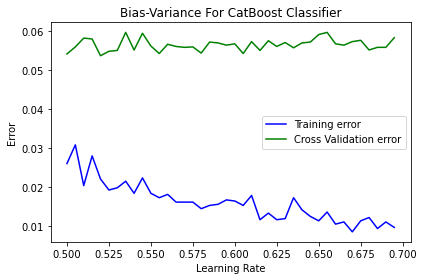

In [49]:
plt.plot(parameter_range, mean_train_score,
     label = "Training error", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation error", color = 'g')
 
plt.title("Bias-Variance For CatBoost Classifier")
plt.xlabel("Learning Rate")
plt.ylabel("Error")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()